# Week 1: Supervised Learning 
#### Done by: Nigel Wee

# Problem 1: Regression to predict Compressive Strength
# (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [3]:
df.describe(include='all')

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [4]:
X = df.iloc[:,:8]
y = df.iloc[:,8:]

# (b)

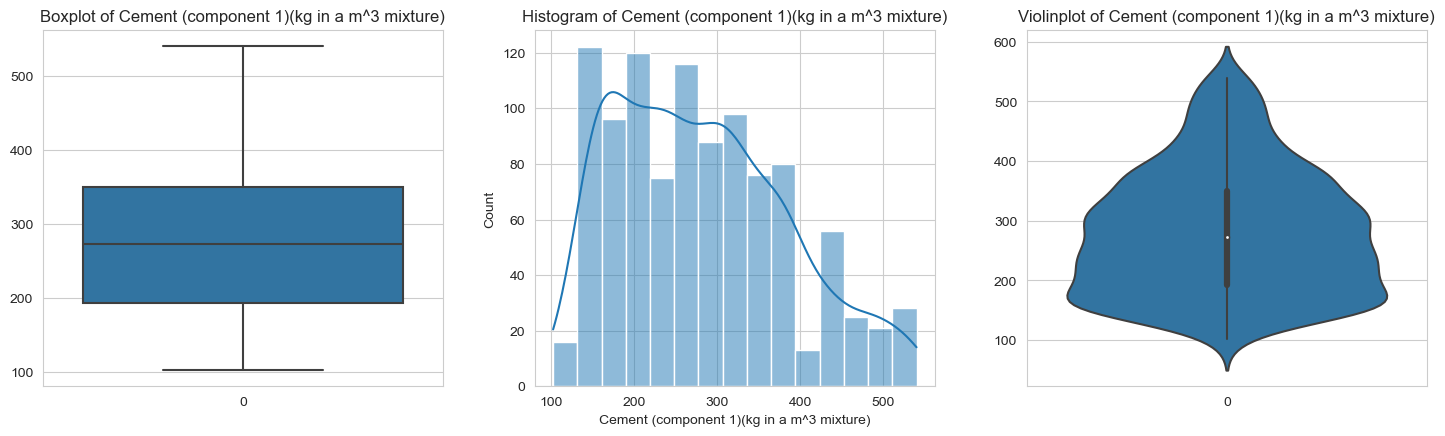

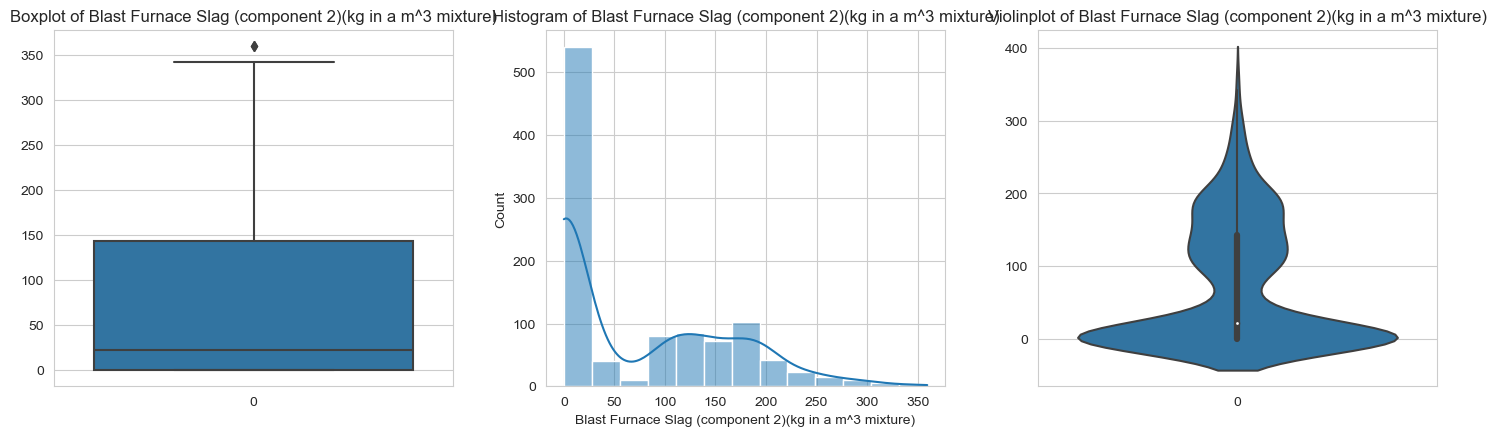

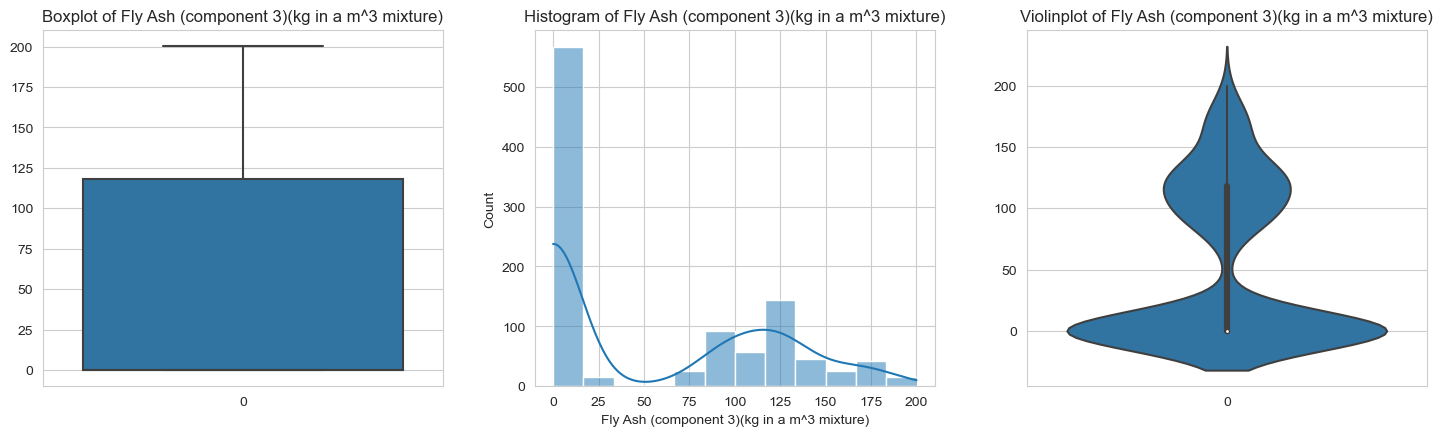

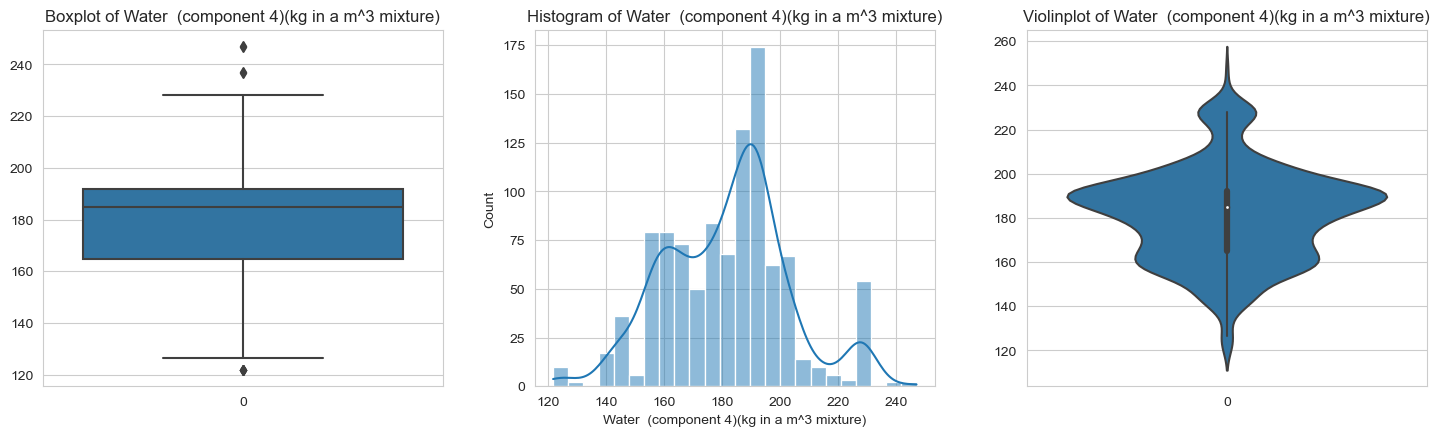

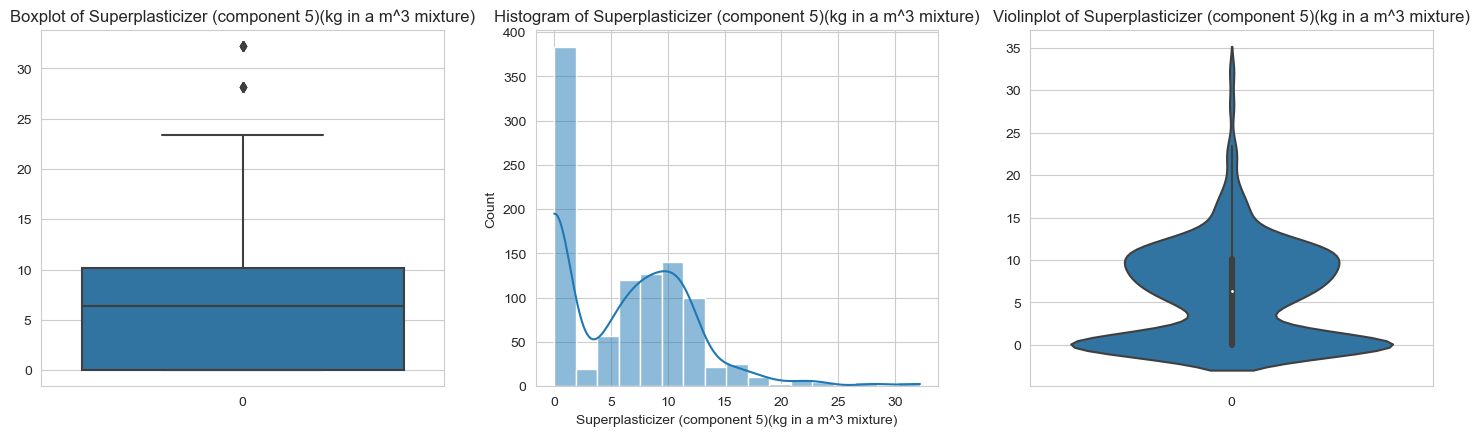

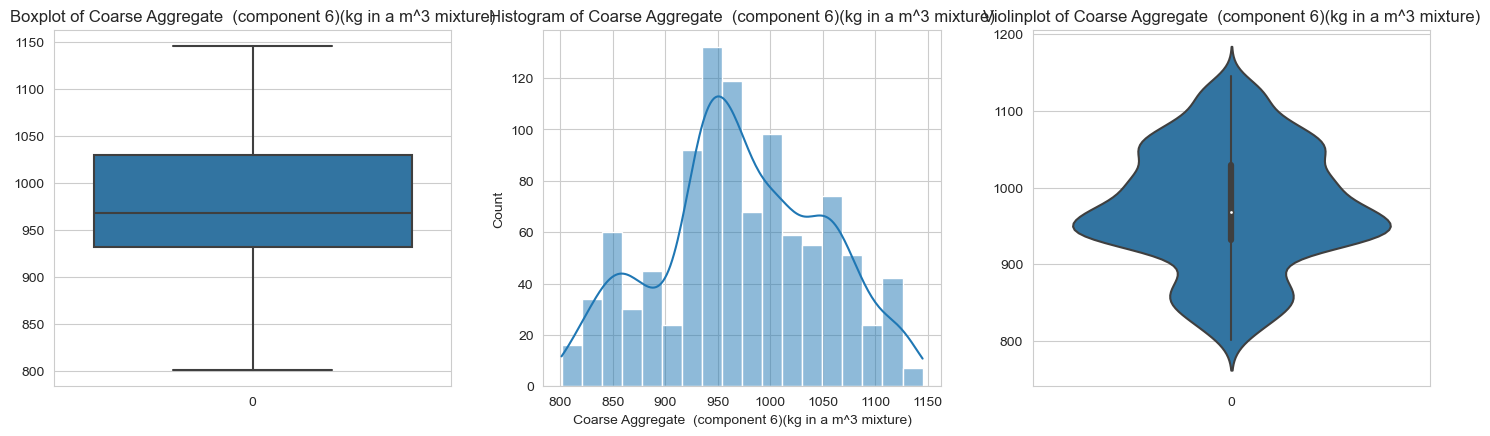

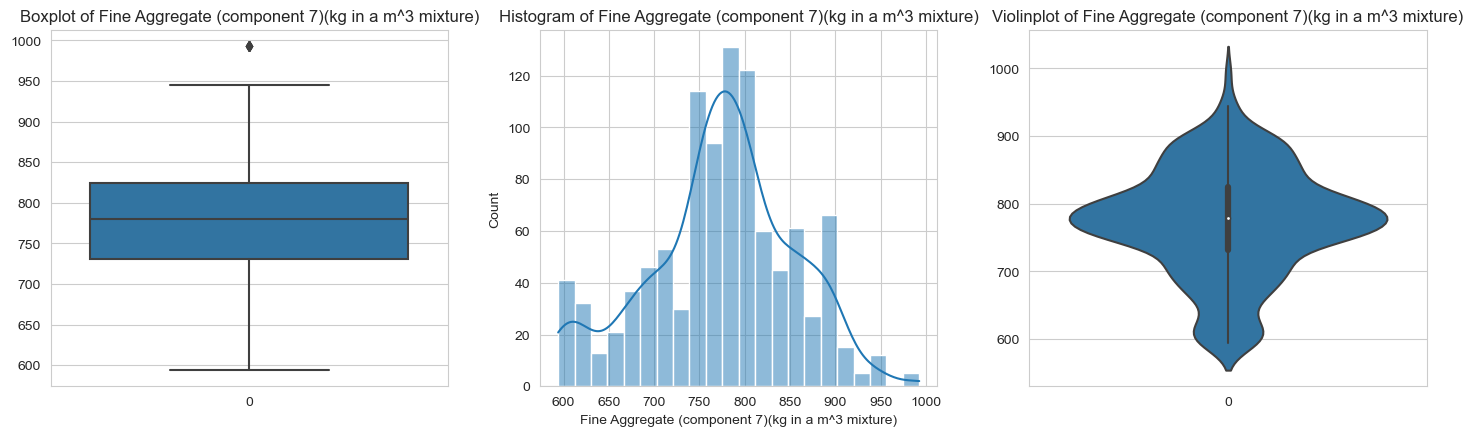

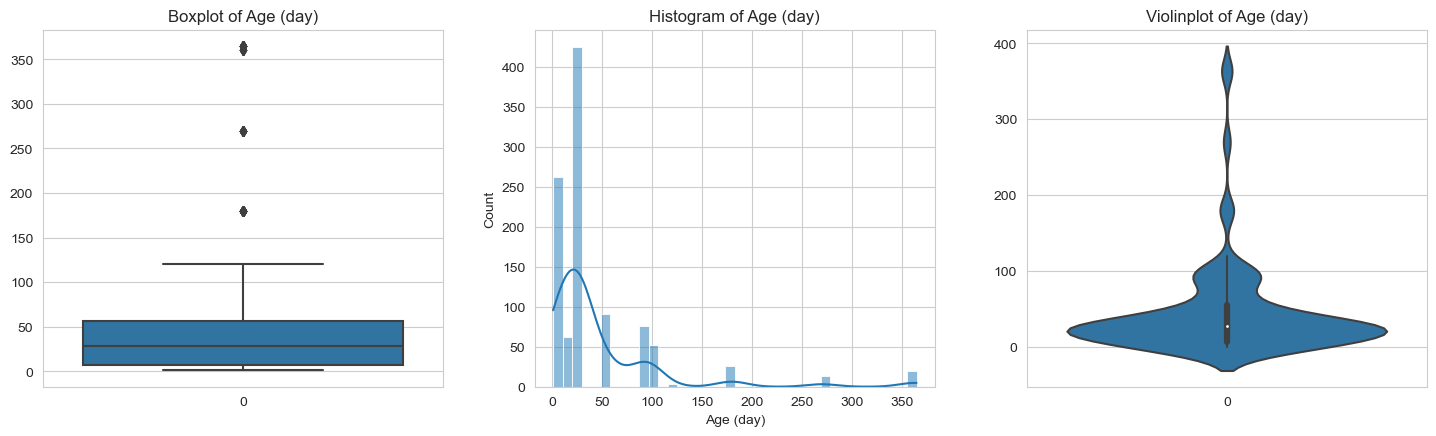

In [5]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Loop through each numeric column in X and plot distributions
for column in X.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15, 5))  # Increase figure width for more space
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=X[column])
    plt.title(f'Boxplot of {column}')
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=X[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=X[column])
    plt.title(f'Violinplot of {column}')
    
    plt.tight_layout(pad=3.0)  # Increase padding between subplots
    plt.show()

# (c)

In [6]:
# Calculate outliers count for each numeric column in X
outliers_counts = {}
for column in X.select_dtypes(include=['number']).columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((X[column] < lower_bound) | (X[column] > upper_bound)).sum()
    outliers_counts[column] = outliers_count

# Print outlier counts for each variable
print("Outlier Counts:")
for column, count in outliers_counts.items():
    print(f"{column}: {count} outliers")

Outlier Counts:
Cement (component 1)(kg in a m^3 mixture): 0 outliers
Blast Furnace Slag (component 2)(kg in a m^3 mixture): 2 outliers
Fly Ash (component 3)(kg in a m^3 mixture): 0 outliers
Water  (component 4)(kg in a m^3 mixture): 9 outliers
Superplasticizer (component 5)(kg in a m^3 mixture): 10 outliers
Coarse Aggregate  (component 6)(kg in a m^3 mixture): 0 outliers
Fine Aggregate (component 7)(kg in a m^3 mixture): 5 outliers
Age (day): 59 outliers


# 1. The fine aggregate variable is the most "Normal" looking distribution from the symmetrical shape of its data. 
# 2. The age (day) variable has the greatest number of outliers from using the count of occurences that are outside of the interquartile range (IQR).

# (d)

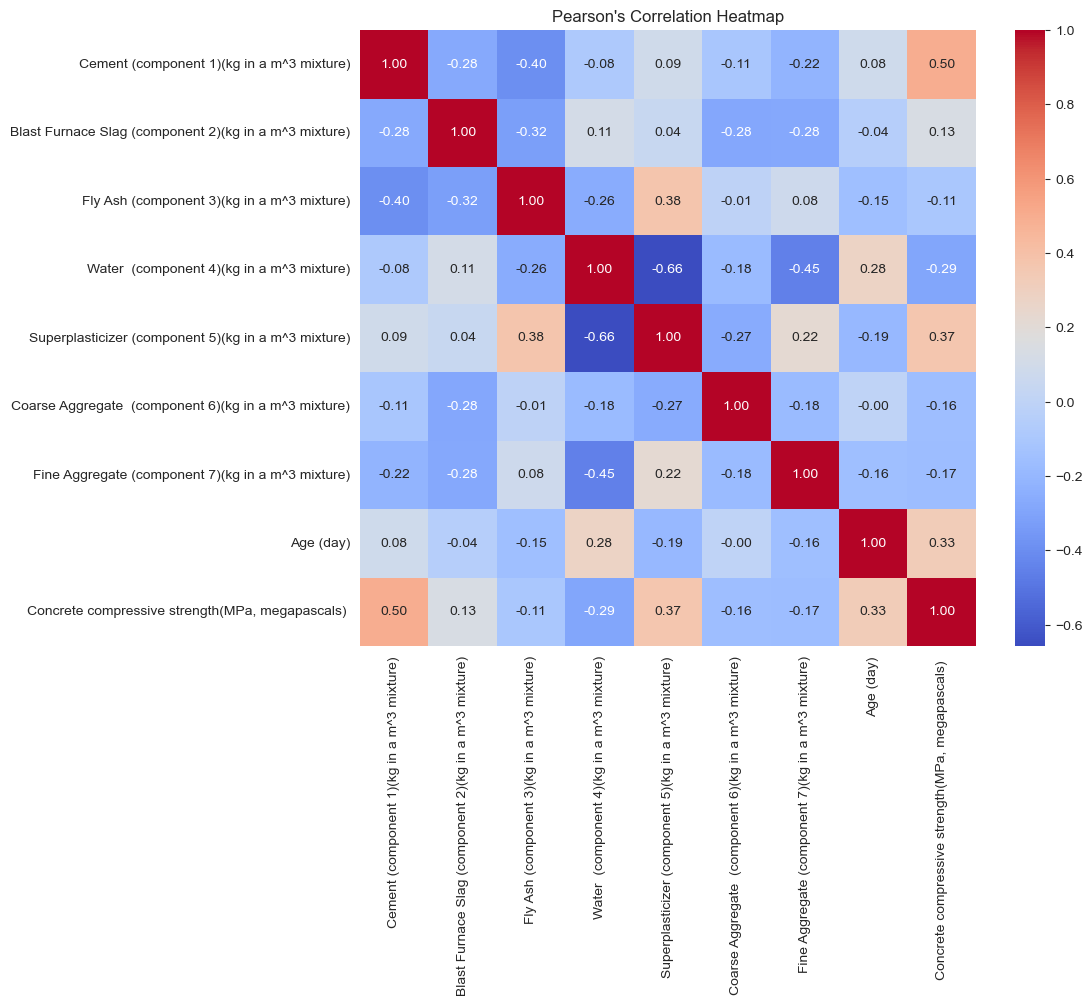

In [7]:
# Concatenate X and y to form a new DataFrame for correlation calculation
df_corr = pd.concat([X, y], axis=1)

# Calculate Pearson's correlation coefficients
correlation_matrix = df_corr.corr()

# Plotting the heatmap with equal labels on top and left sides
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson's Correlation Heatmap")
plt.show()

# (e)

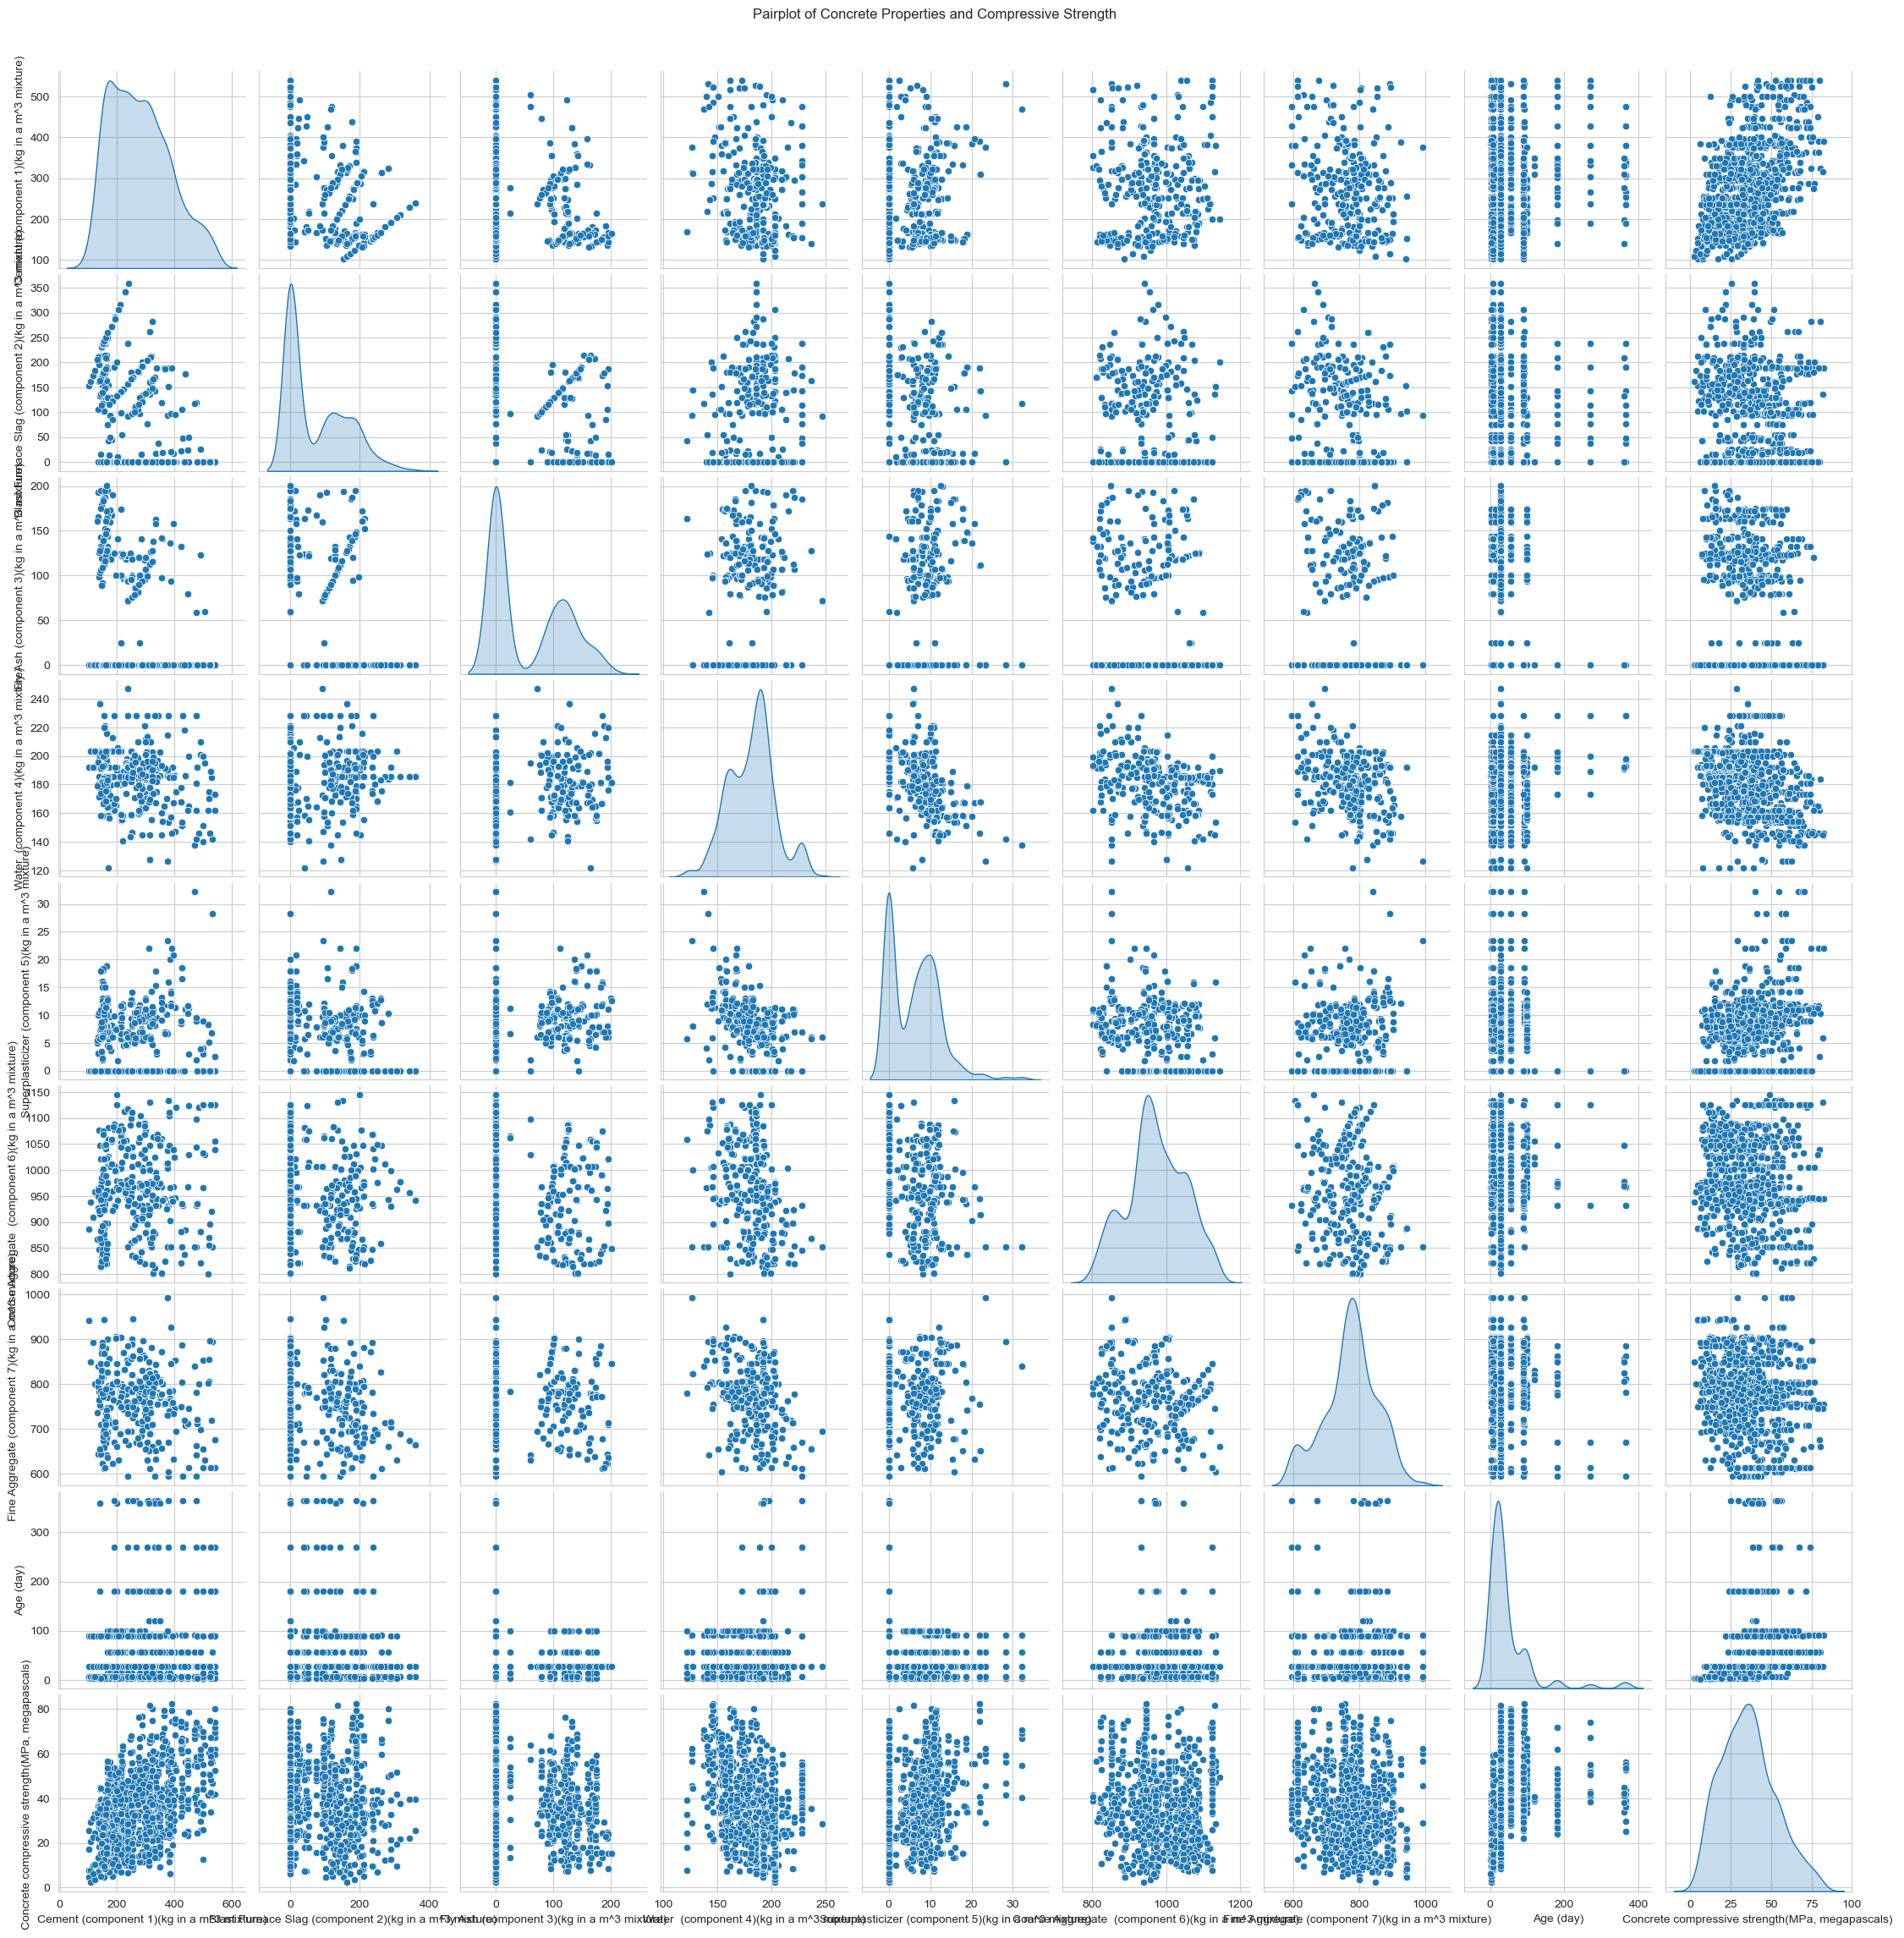

In [8]:
# Create a pairplot
sns.pairplot(df_corr, diag_kind='kde')
plt.suptitle('Pairplot of Concrete Properties and Compressive Strength', y=1.02)
plt.show()

# (f)

In [9]:
# Train - Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling is done because certain machine learning models work better when all the features are of the same magnitude
from sklearn.preprocessing import MinMaxScaler

#These lines of code do a min-max scaling of the X and Y dataframes
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y.columns)
y_test = pd.DataFrame(scaler_y.transform(y_test), columns=y.columns)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

def plot(regressor_name, y_train, y_pred_train, y_test, y_pred_test):

    plt.figure(figsize = (14,6))

    ax1 = plt.subplot(121)

    plt.scatter(y_train,y_pred_train)
    
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--', lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)

    rmse_train = np.round(np.sqrt(mean_squared_error(y_train,y_pred_train)),4)
    r2_train = np.round(r2_score(y_train,y_pred_train),4)
    
    plt.title(regressor_name+ ' ('+ str(y_train.name) + ')' +' \nTraining Set' '\nRMSE: '+str(rmse_train) + '\n$R^{2}$: ' + str(r2_train),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)

    ax2 = plt.subplot(122)
    
    plt.scatter(y_test,y_pred_test)
    
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    rmse_test = np.round(np.sqrt(mean_squared_error(y_test,y_pred_test)),4)
    r2_test = np.round(r2_score(y_test,y_pred_test),4)
    
    plt.title(regressor_name+ ' ('+ str(y_test.name) + ')' +' \nTest Set' '\nRMSE: '+str(rmse_test) + '\n$R^{2}$: ' + str(r2_test),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
    
    plt.tight_layout()
    plt.show()

    return rmse_train, rmse_test, r2_train, r2_test

In [12]:
#We want to compare different models. So all the different metrics are stored in this list.
train_rmse = {}
test_rmse = {}  
train_r2 = {}
test_r2 = {}

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators' : np.arange(50, 120, 10),
             'max_depth' : np.arange(1, 20, 1),
             'min_samples_split' : np.arange(2, 5, 1),
             'min_samples_leaf' : np.arange(2, 5, 1)}

regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1,
                       return_train_score=True,
                       n_iter = 100)

scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')

regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d 

Mean Cross Validation Score (RMSE) = 0.066
Test Score (RMSE) = 0.07
Training Score (R Squared) = 0.9754572937610699
Test Score (R Squared) = 0.8780242513354001
RandomForestRegressor(max_depth=17, min_samples_leaf=2, n_estimators=80,
                      random_state=42)


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [14]:
test_rmse['Random Forest Regression (single test-train)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Random Forest Regression (single test-train)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Random Forest Regression (single test-train)'] = r2_score(y_test,y_pred_test)
train_r2['Random Forest Regression (single test-train)'] = r2_score(y_train,y_pred_train)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators' : np.arange(50, 120, 10),
             'max_depth' : np.arange(1, 20, 1),
             'min_samples_split' : np.arange(2, 5, 1),
             'min_samples_leaf' : np.arange(2, 5, 1)}

regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring='neg_mean_squared_error',
                       cv = 10,
                       refit = True,
                       n_jobs=-1,
                       return_train_score=True,
                       n_iter = 100)

regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

Mean Cross Validation Score (RMSE) = 0.066
Test Score (RMSE) = 0.069
Training Score (R Squared) = 0.9754409172821029
Test Score (R Squared) = 0.8794107493949017
RandomForestRegressor(max_depth=19, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=90, random_state=42)


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [16]:
test_rmse['Random Forest Regression (10-fold test-train)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Random Forest Regression (10-fold test-train)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Random Forest Regression (10-fold test-train)'] = r2_score(y_test,y_pred_test)
train_r2['Random Forest Regression (10-fold test-train)'] = r2_score(y_train,y_pred_train)

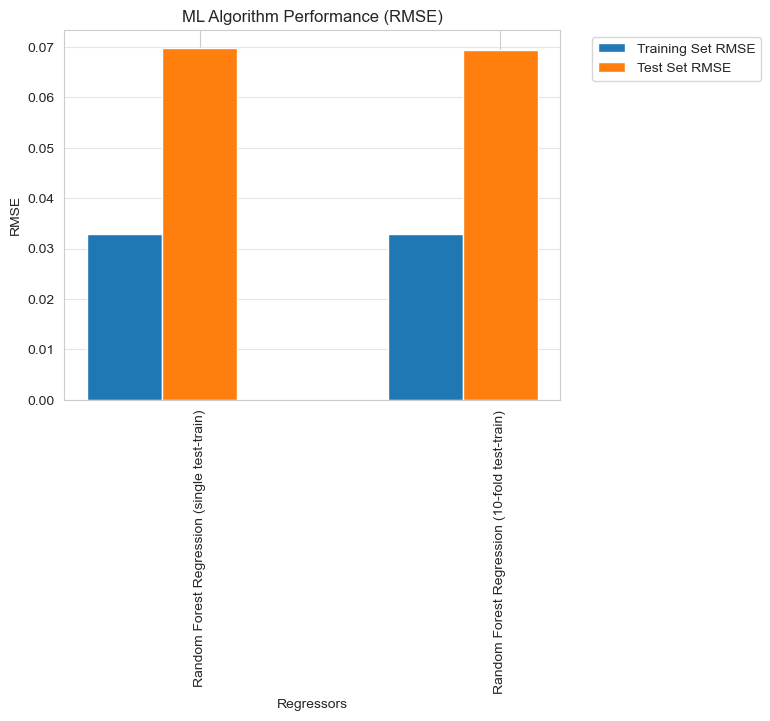

In [17]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

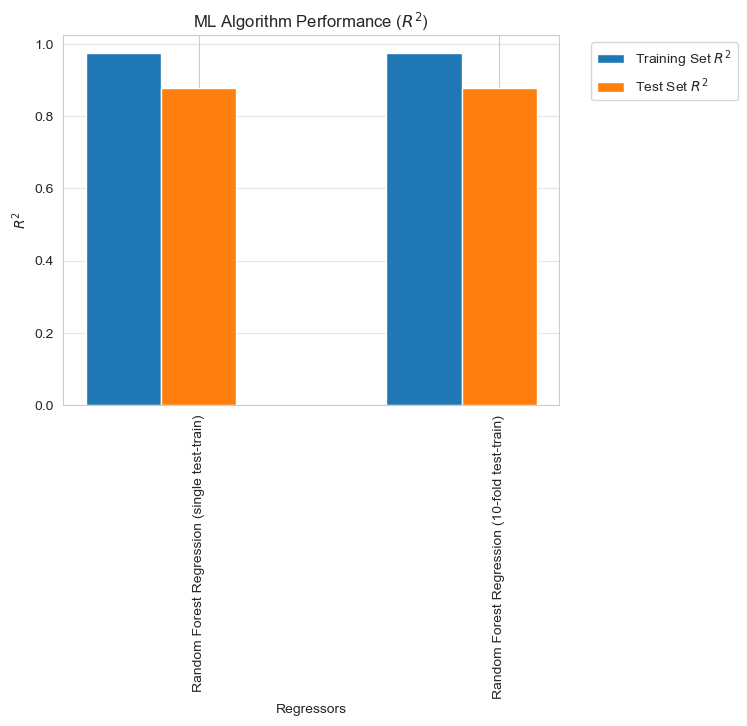

In [18]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# The differences seen between the single test-train and the 10-fold test-train are insignificant. This could suggest model is stable across different data splits as it is not sensitive to a specific test-train dataset. 

# (g)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = best_gbr.predict(X_train)
y_pred_test = best_gbr.predict(X_test)

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-grid_search.best_score_),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(f'Lowest MSE: {-grid_search.best_score_}\nUsing Hyperparameters: {grid_search.best_params_}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Cross Validation Score (RMSE) = 0.057
Test Score (RMSE) = 0.055
Training Score (R Squared) = 0.9920577038556339
Test Score (R Squared) = 0.9256452423416935
Lowest MSE: 0.0032644231368965495
Using Hyperparameters: {'learning_rate': 0.15, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [20]:
test_rmse['Gradient Boost'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Gradient Boost'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Gradient Boost'] = r2_score(y_test,y_pred_test)
train_r2['Gradient Boost'] = r2_score(y_train,y_pred_train)

In [21]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(y.shape[1], **options))
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model, verbose=0)

params = {
    'n_hidden' : [1,2,3],
    'n_neurons' : [2,4,8,16,32,64,128],
}

from sklearn.model_selection import RandomizedSearchCV

regressor = RandomizedSearchCV(keras_reg, param_distributions = params, cv=5, n_iter=21, random_state=42,
                                  scoring='neg_mean_squared_error')

regressor.fit(X_train, y_train, epochs = 30)

print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')

C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\3139627618.py:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model, verbose=0)


Lowest MSE: 0.0053011655799483515
Using Hyperparameters: {'n_neurons': 128, 'n_hidden': 3}


7/7 [==============================] - 0s 693us/step


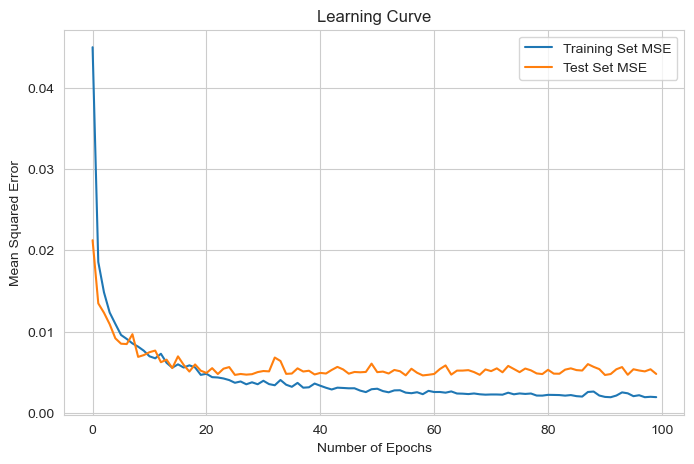

loss        0.001957
val_loss    0.004808
Name: 99, dtype: float64

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [23]:
test_rmse['Neural Network'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network'] = r2_score(y_train,y_pred_train)

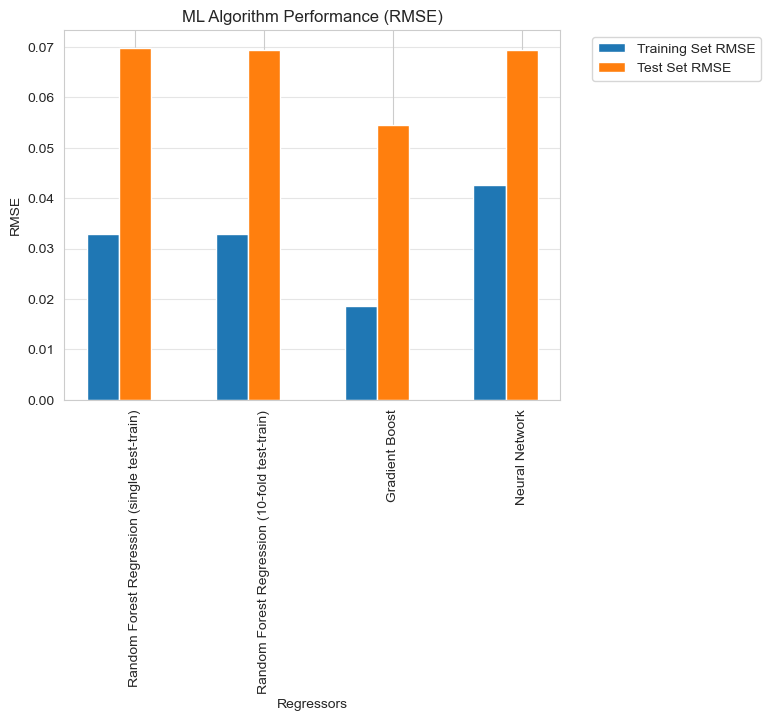

In [24]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

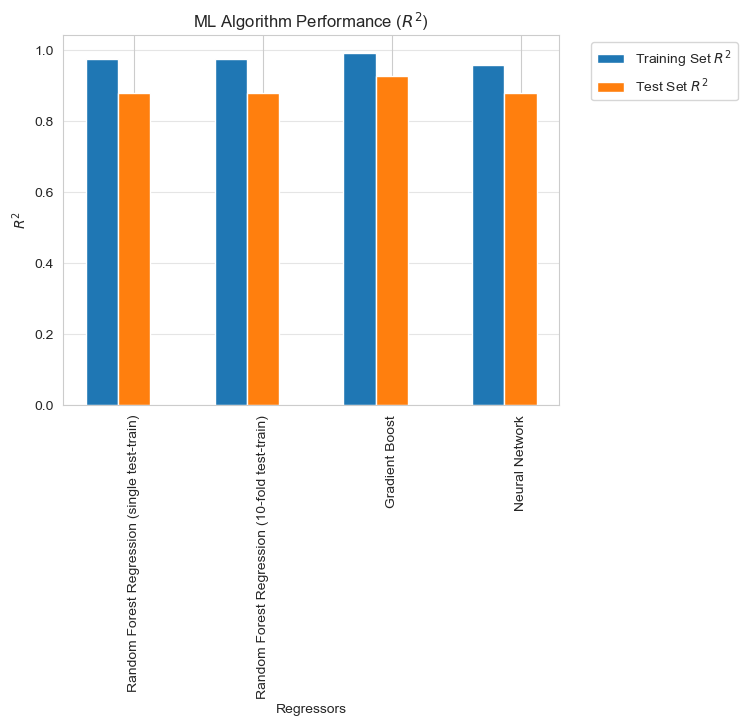

In [25]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
print(test_rmse)

{'Random Forest Regression (single test-train)': 0.0698455483959889, 'Random Forest Regression (10-fold test-train)': 0.06944744676219693, 'Gradient Boost': 0.05453262036569982, 'Neural Network': 0.06933692801575138}


In [27]:
print(test_r2)

{'Random Forest Regression (single test-train)': 0.8780242513354001, 'Random Forest Regression (10-fold test-train)': 0.8794107493949017, 'Gradient Boost': 0.9256452423416935, 'Neural Network': 0.8797942557391765}


# Comparing the performances of both Gradient Boost (GB) and Neural Network (NN) will show that the GB is better than NN from both the RMSE and R^2. 
# GB showed a RMSE and R^2 of 0.0545 and 0.925, while NN showed a RMSE and R^2 of 0.0693 and 0.879 respectively. 
# Furthermore, the lowest MSE of GB is lower at 0.00326 while NN is 0.00530.

# (h)

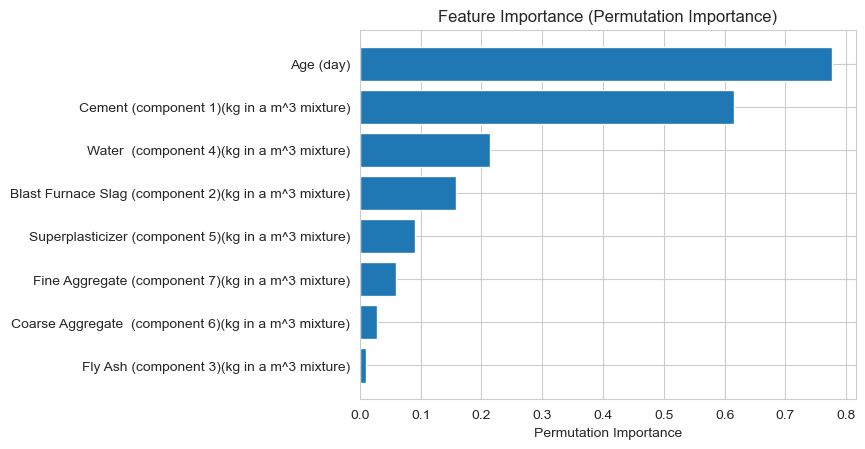

In [28]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(best_gbr, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Plot feature importance
sorted_idx = result.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation Importance)")
plt.show()

# (i)

# The hyperparameters that I would change to obtain better accuracy would be to increase the hyperparameter search space for both the number hidden layers and number of neurons per layer. This could possibly identify a better set of optimal hyperparameters for an even better lowest MSE. 
# Other than the above, could be the optimiser used, instead of Adam optimiser it could be possible to explore the use of RMSprop, or SGD (Stochastic Gradient Descent).

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the function to build the neural network model
def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = Sequential()
    options = {"input_shape": input_shape}
    
    # Add the first hidden layer with specified number of neurons and activation function
    model.add(Dense(n_neurons, activation="relu", **options))
    options = {}  # Clear options for subsequent layers
    
    # Add two additional hidden layers with the same number of neurons and activation function
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}  # Clear options for subsequent layers
    
    # Add the output layer with appropriate activation function
    model.add(Dense(y.shape[1], **options))
    
    # Compile the model with the Adam optimizer and MSE loss function
    optimizer = Adam()
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create a KerasRegressor using the build_model function
keras_reg = KerasRegressor(build_fn=build_model, verbose=0)

# Define the hyperparameter search space
params = {
    'n_hidden': [1, 2, 3],  # Number of hidden layers
    'n_neurons': [2, 4, 8, 16, 32, 64, 128],  # Number of neurons per layer
}

# Perform Randomized Search Cross Validation
regressor = RandomizedSearchCV(keras_reg, param_distributions=params, cv=5, n_iter=21, random_state=42,
                               scoring='neg_mean_squared_error')

# Fit the model with the new architecture and hyperparameters
regressor.fit(X_train, y_train, epochs=30)

# Print the results
print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')

C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\3916036577.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_model, verbose=0)


Lowest MSE: 0.004854059470013617
Using Hyperparameters: {'n_neurons': 128, 'n_hidden': 2}


7/7 [==============================] - 0s 841us/step


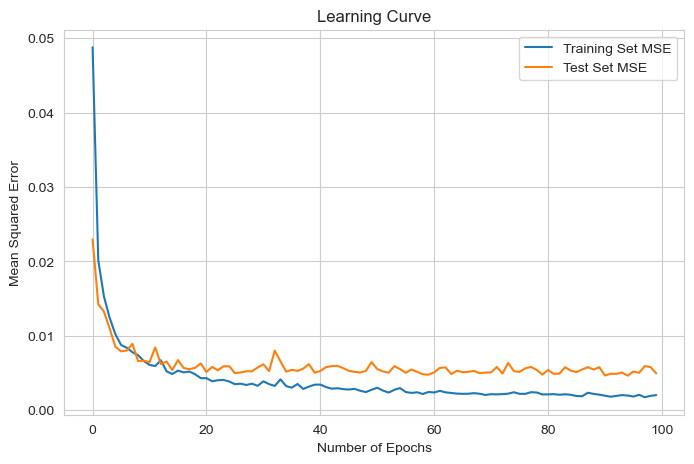

loss        0.002043
val_loss    0.004962
Name: 99, dtype: float64

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [31]:
test_rmse['Neural Network (2-added layers)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network (2-added layers)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network (2-added layers)'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network (2-added layers)'] = r2_score(y_train,y_pred_train)

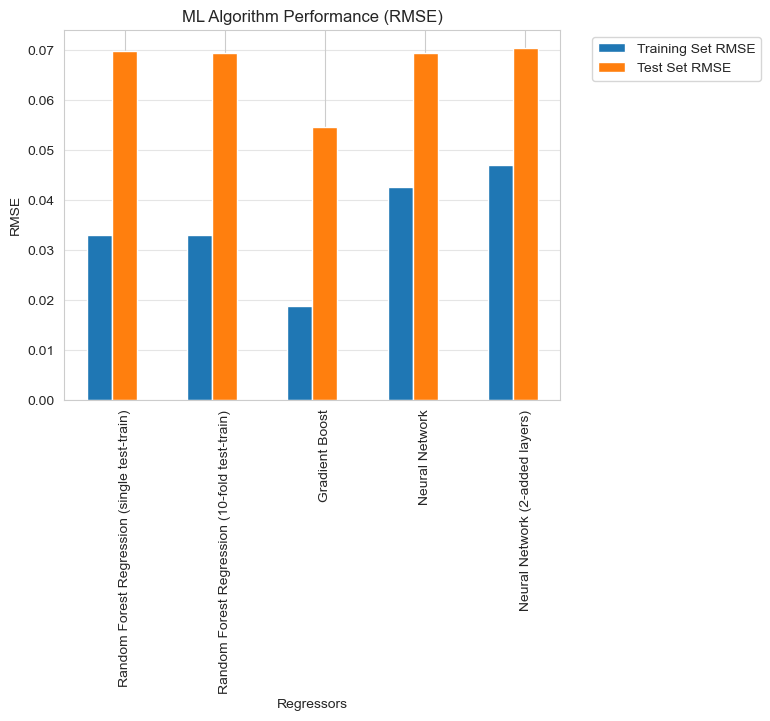

In [32]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

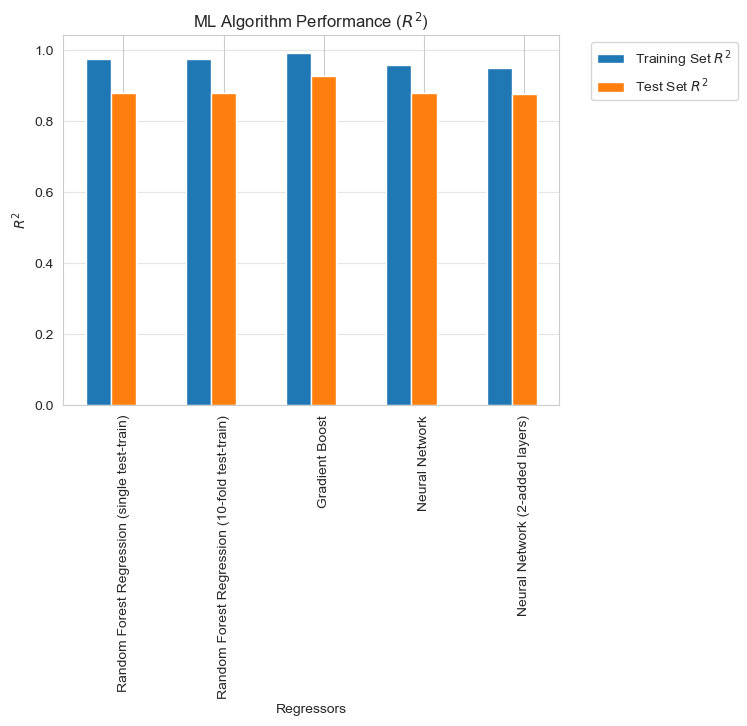

In [33]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# The prediction accuracy of the model drops as in both the RMSE and R^2 values, moreso the RMSE value.

# Problem 2: Regression on new dataset
# Dataset: Tsanas,Athanasios and Xifara,Angeliki. (2012). Energy Efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.
# (a)

In [34]:
df2 = pd.read_excel('ENB2012_data.xlsx')
df2

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]

# 1. Problem Statement
# The problem here would be that of a supervised multivariate regression with labelled x (input) and y (output) data.
# Other relevant key information that is given is that X6 and X8 are integer datatypes while the rest are continuous datatypes.
# Additionally, y1 and y2 will be the heating and cooling load respectively. 
# Therefore, a building in Singapore (tropical country) would prioritise having a better (low) cooling load as compared to having a low heating load as heating the building is very unlikely needed to be heated up. 
# Whereas a building in a temperate climate would generally experience a wider range of temperatures from the cold of winter to the heat of summer.
# Therefore, the building would be need optimise both heating and cooling loads in order to have better efficiency.

# Hence, the problem statement in general should be to target both having a low heating and cooling load for the sake of energy efficiency.

In [35]:
X = df2.iloc[:,:8]
y = df2.iloc[:,8:]

In [36]:
X.head()

X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0

In [37]:
y.head()

Y1     Y2
0  15.55  21.33
1  15.55  21.33
2  15.55  21.33
3  15.55  21.33
4  20.84  28.28

# 2. Exploratory Data Analysis (EDA)

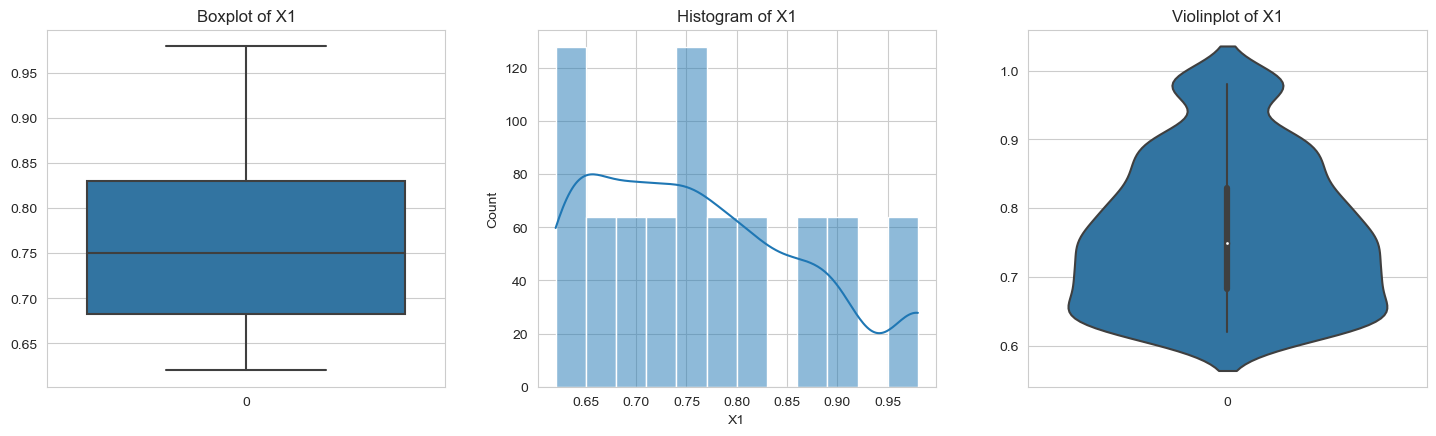

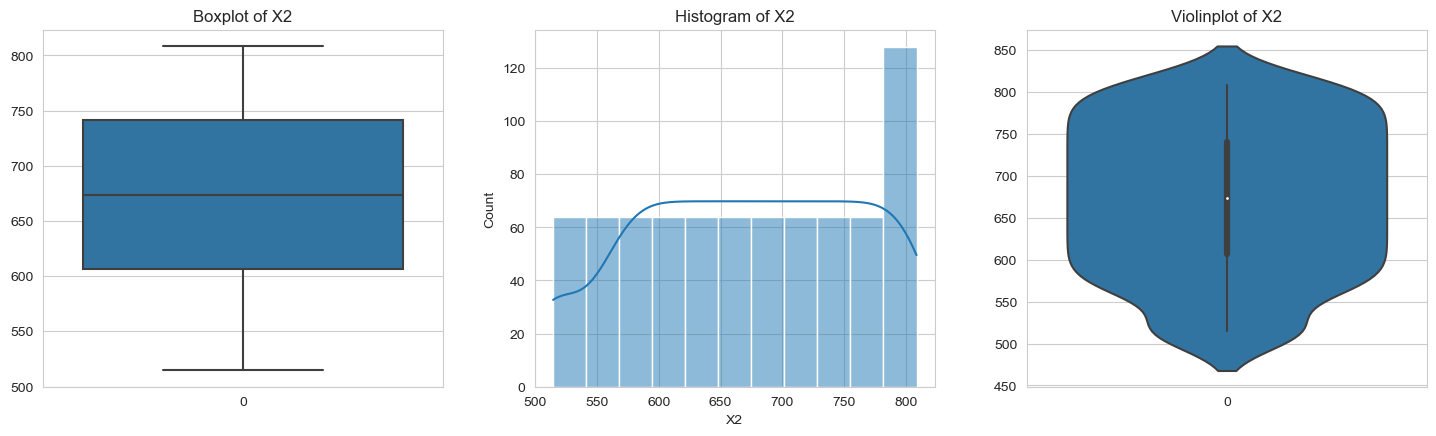

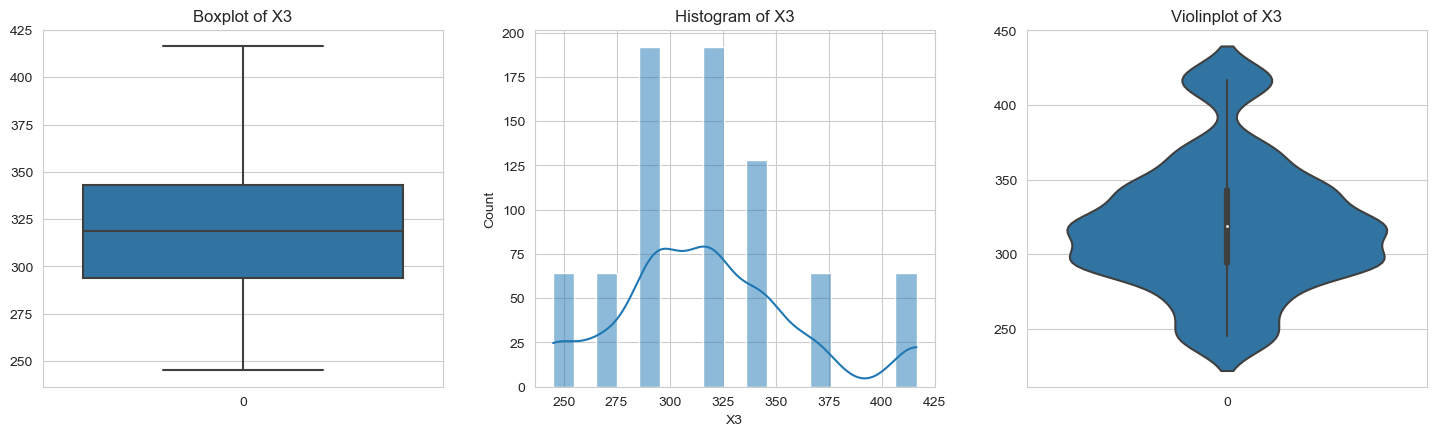

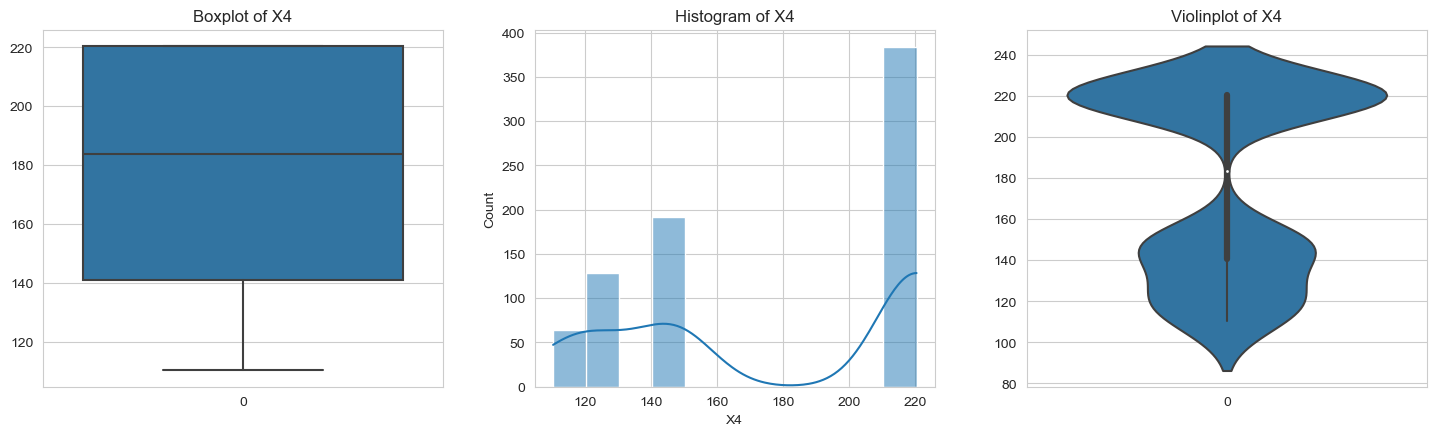

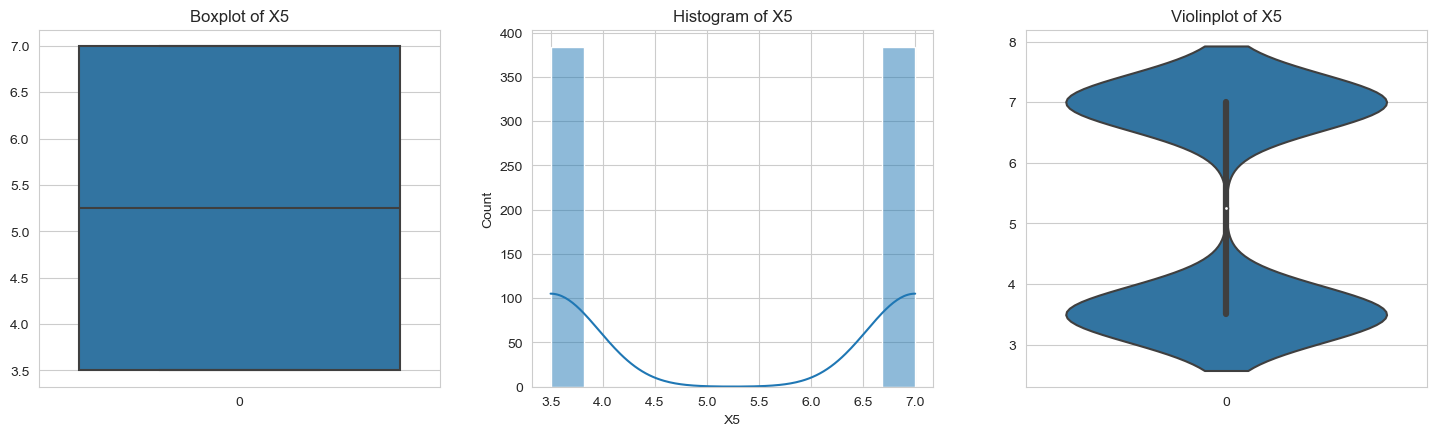

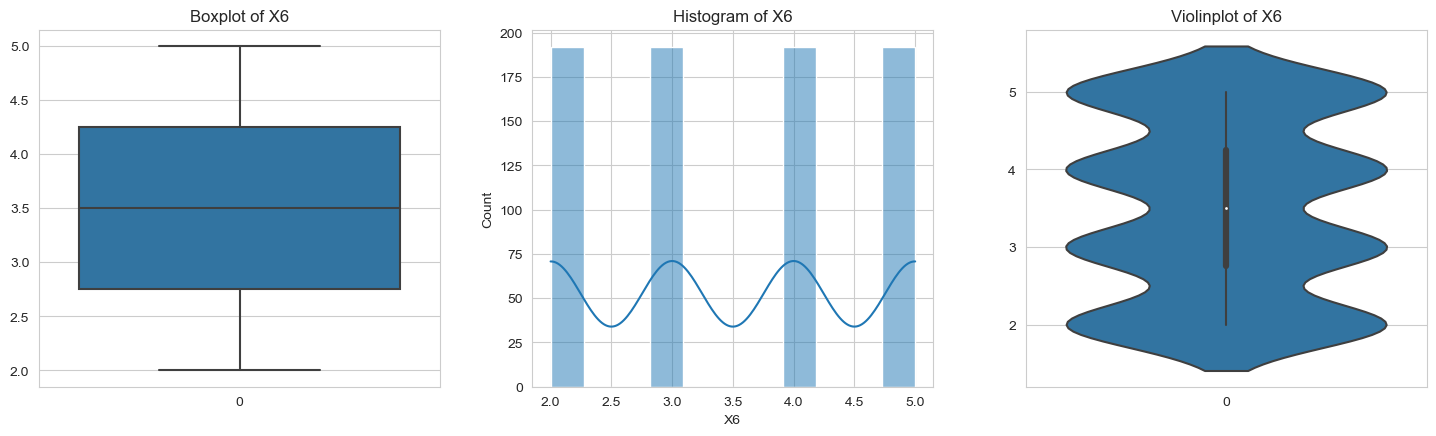

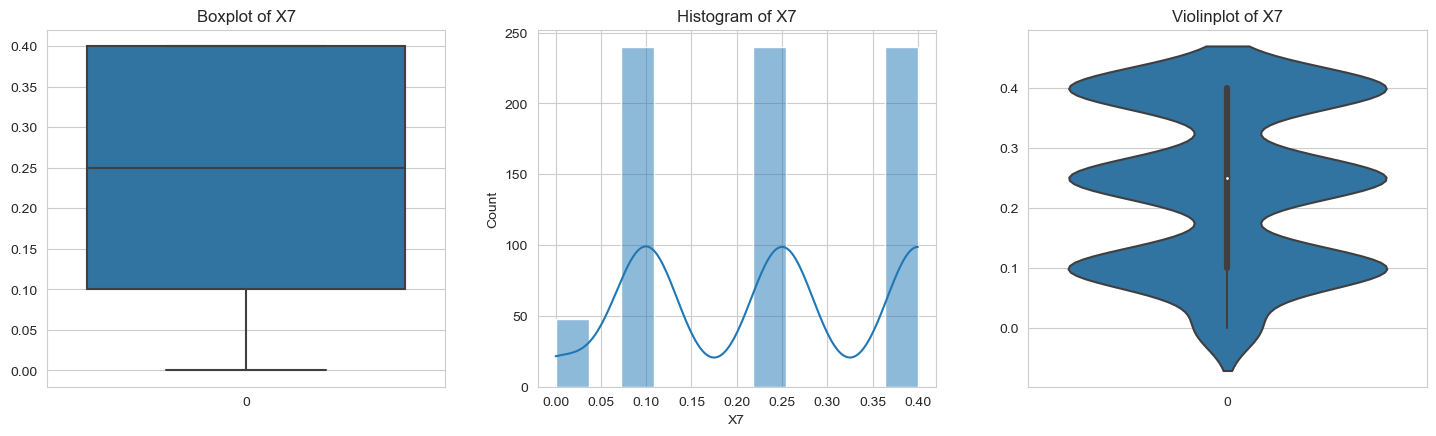

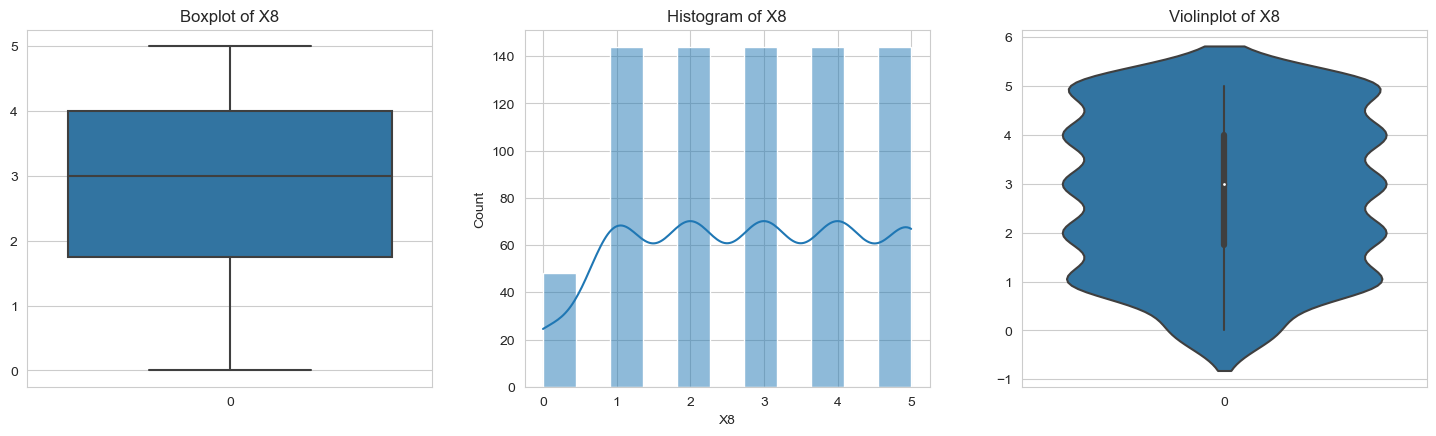

In [38]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Loop through each numeric column in X and plot distributions
for column in X.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15, 5))  # Increase figure width for more space
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=X[column])
    plt.title(f'Boxplot of {column}')
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=X[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=X[column])
    plt.title(f'Violinplot of {column}')
    
    plt.tight_layout(pad=3.0)  # Increase padding between subplots
    plt.show()

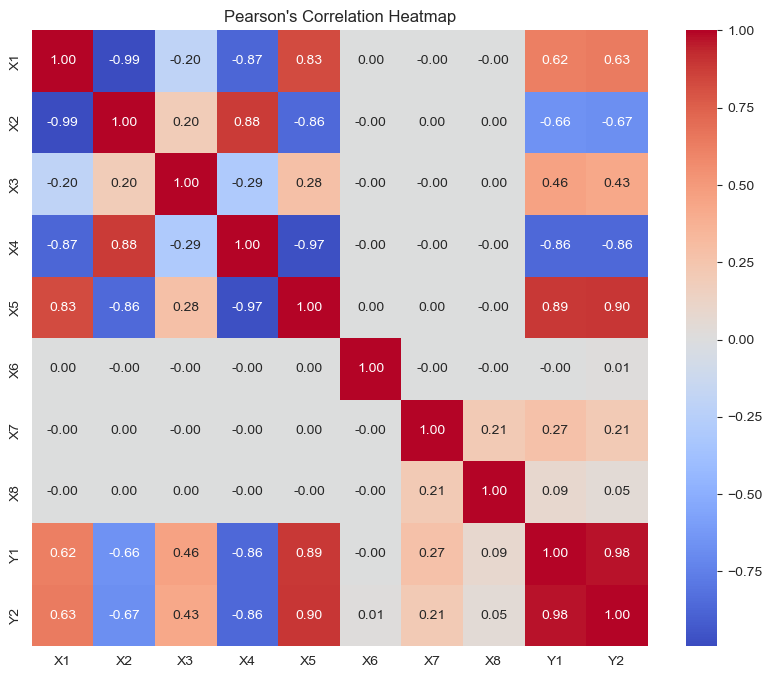

In [39]:
# Concatenate X and y to form a new DataFrame for correlation calculation
df_corr = pd.concat([X, y], axis=1)

# Calculate Pearson's correlation coefficients
correlation_matrix = df_corr.corr()

# Plotting the heatmap with equal labels on top and left sides
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson's Correlation Heatmap")
plt.show()

# Possible useful note to make here would be that both Y outputs are highly correlated with each other.

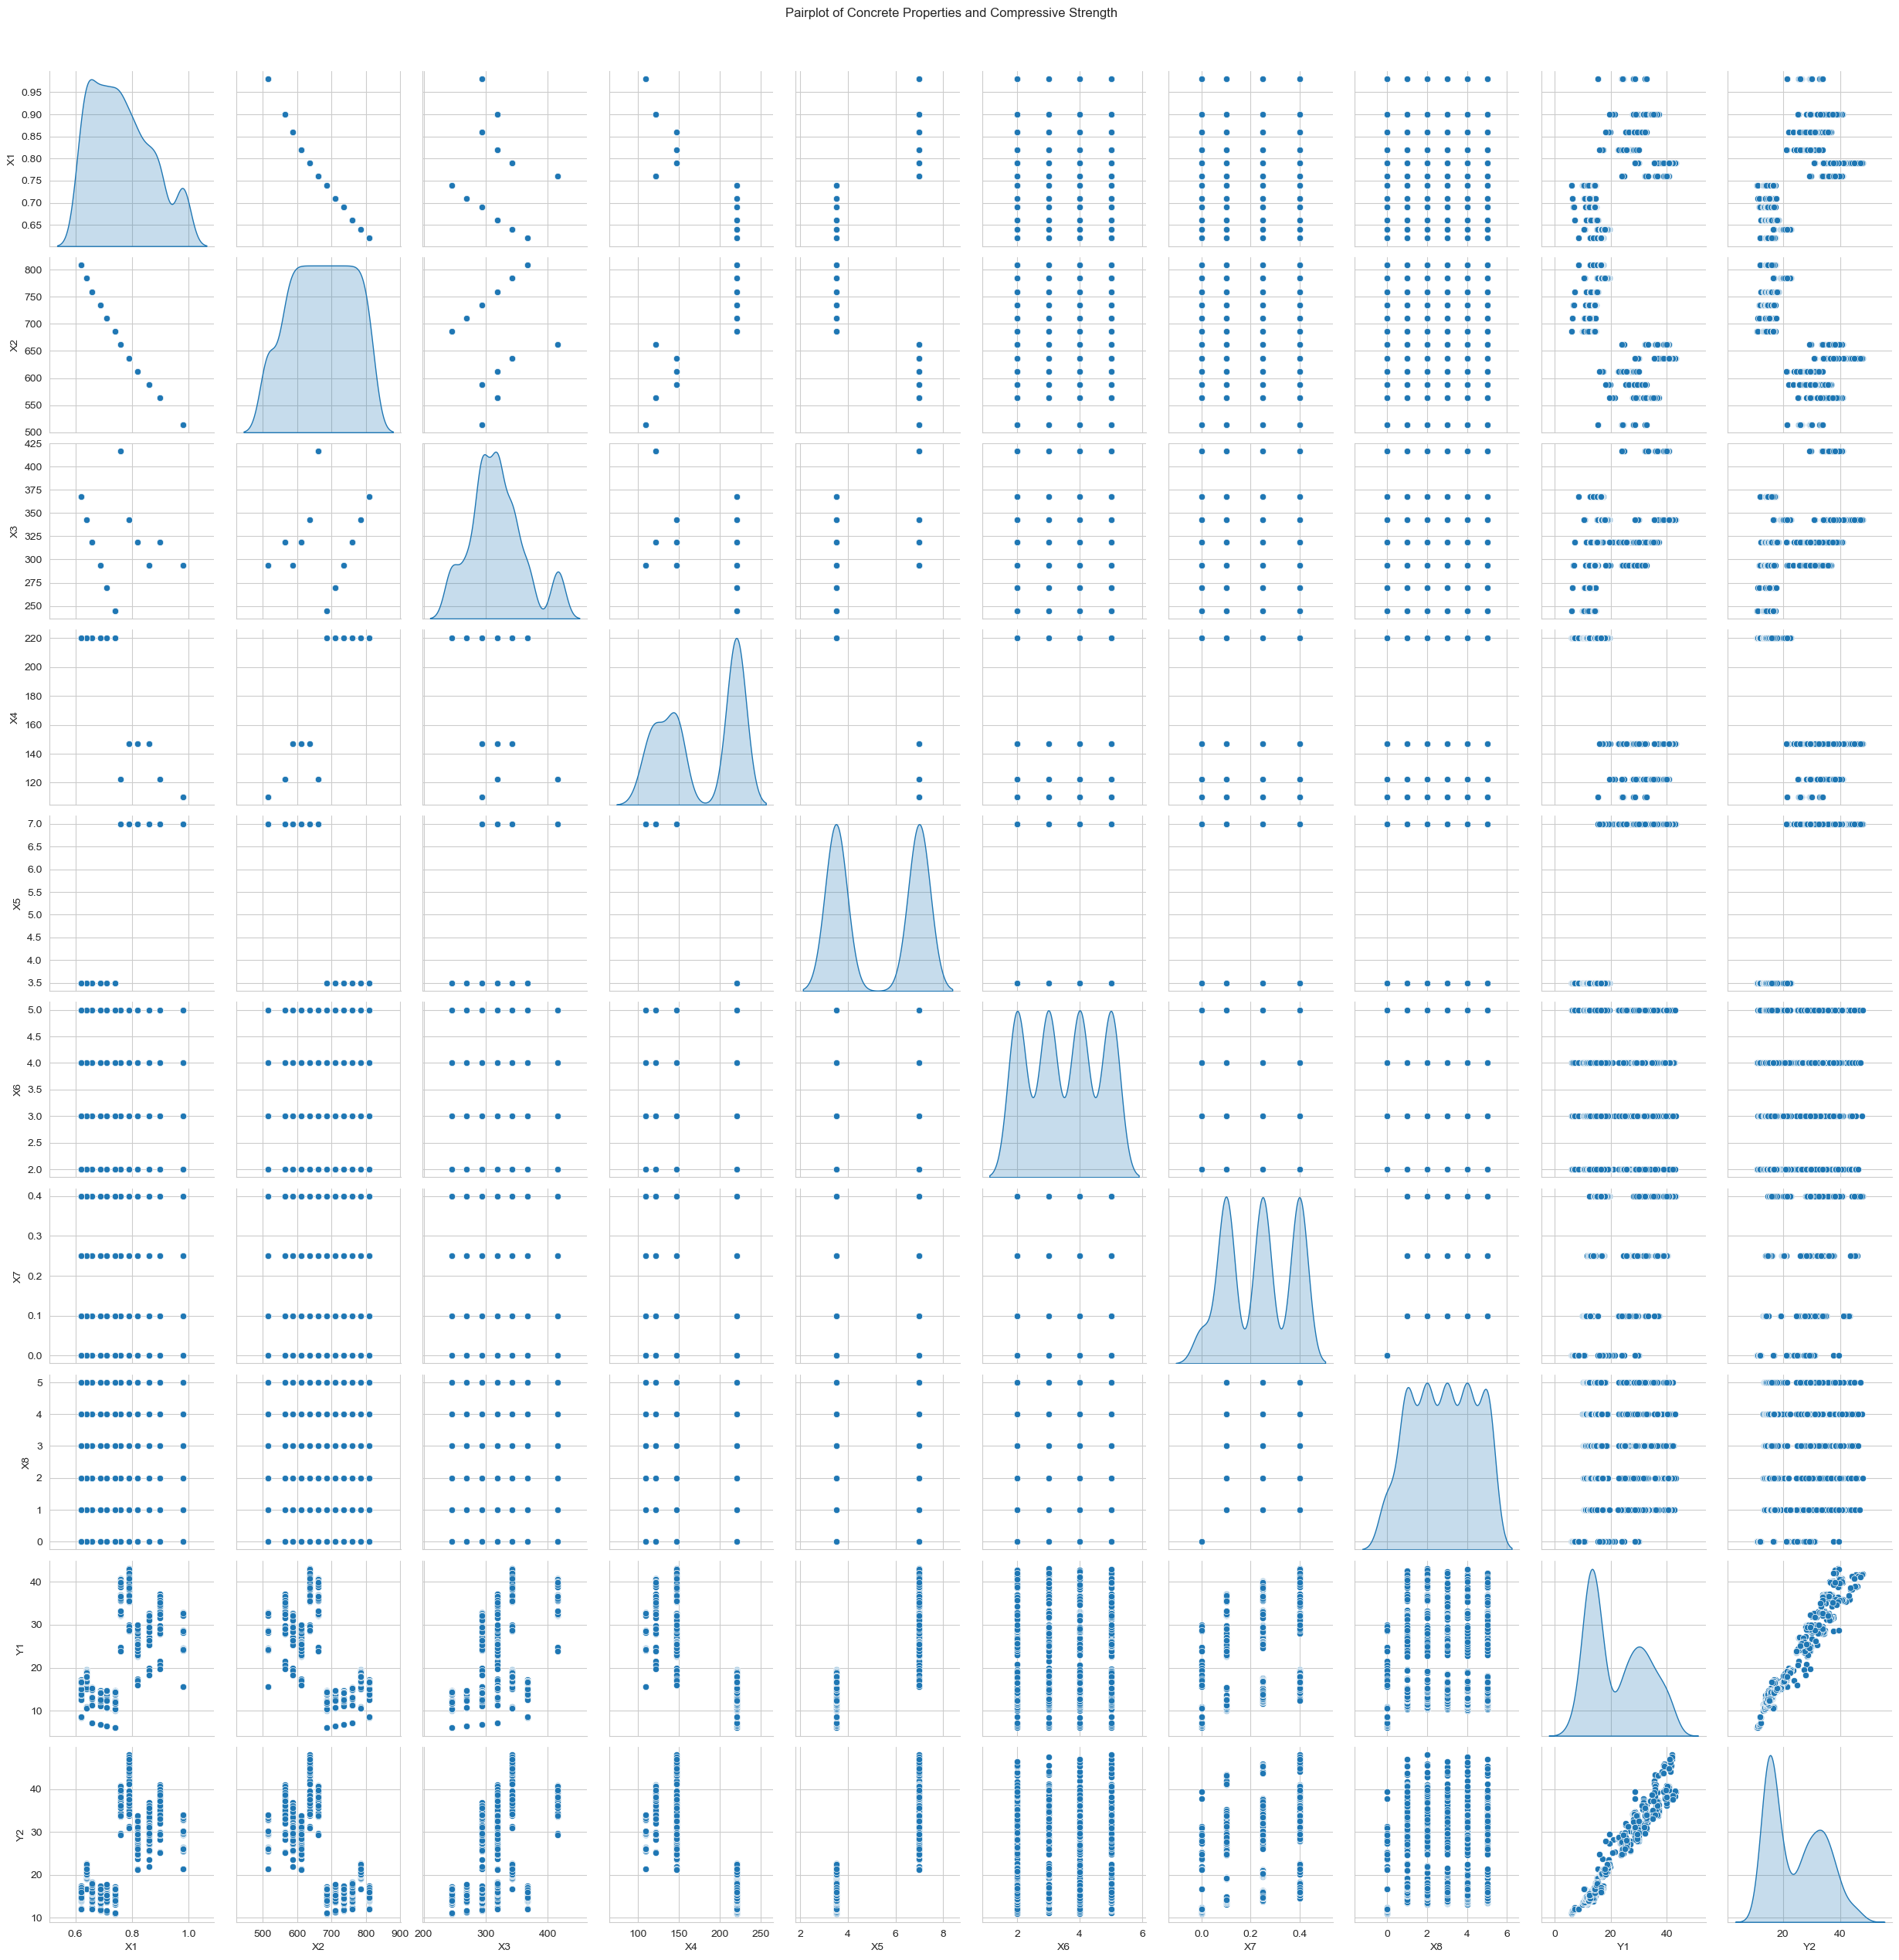

In [40]:
# Create a pairplot
sns.pairplot(df_corr, diag_kind='kde')
plt.suptitle('Pairplot of Concrete Properties and Compressive Strength', y=1.02)
plt.show()

# 3. Regression

In [41]:
# Train - Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Feature Scaling is done because certain machine learning models work better when all the features are of the same magnitude
from sklearn.preprocessing import MinMaxScaler

#These lines of code do a min-max scaling of the X and Y dataframes
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y.columns)
y_test = pd.DataFrame(scaler_y.transform(y_test), columns=y.columns)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

def plot(regressor_name, y_train, y_pred_train, y_test, y_pred_test):

    plt.figure(figsize = (14,6))

    ax1 = plt.subplot(121)

    plt.scatter(y_train,y_pred_train)
    
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--', lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)

    rmse_train = np.round(np.sqrt(mean_squared_error(y_train,y_pred_train)),4)
    r2_train = np.round(r2_score(y_train,y_pred_train),4)
    
    plt.title(regressor_name+ ' ('+ str(y_train.name) + ')' +' \nTraining Set' '\nRMSE: '+str(rmse_train) + '\n$R^{2}$: ' + str(r2_train),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)

    ax2 = plt.subplot(122)
    
    plt.scatter(y_test,y_pred_test)
    
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3) 
    
    plt.xlabel('Actual Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    rmse_test = np.round(np.sqrt(mean_squared_error(y_test,y_pred_test)),4)
    r2_test = np.round(r2_score(y_test,y_pred_test),4)
    
    plt.title(regressor_name+ ' ('+ str(y_test.name) + ')' +' \nTest Set' '\nRMSE: '+str(rmse_test) + '\n$R^{2}$: ' + str(r2_test),fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
    
    plt.tight_layout()
    plt.show()

    return rmse_train, rmse_test, r2_train, r2_test

In [44]:
#We want to compare different models. So all the different metrics are stored in this list.
train_rmse = {}
test_rmse = {}
train_r2 = {}
test_r2 = {}

# Linear Regression

In [45]:
# Linear Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)
scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')
#for small datasets, choose small CV values - LOOCV
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

scores_regressor

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')

Mean Cross Validation Score (RMSE) = 0.083
Test Score (RMSE) = 0.083
Training Score (R Squared) = 0.9011248455548774
Test Score (R Squared) = 0.902505810026824


In [46]:
test_rmse['Linear Regression'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Linear Regression'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Linear Regression'] = r2_score(y_test,y_pred_test)
train_r2['Linear Regression'] = r2_score(y_train,y_pred_train)

# Lasso Regression

In [47]:
# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {'alpha' : np.arange(0.01, 0.51, 0.05)}

regressor = GridSearchCV(estimator = lasso,
                         param_grid = param_grid,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         cv = 10,
                         refit = True,
                         return_train_score=True)


regressor.fit(X_train, y_train)

scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')
#for small datasets, choose small CV values - LOOCV

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns


print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

Mean Cross Validation Score (RMSE) = 0.1
Test Score (RMSE) = 0.101
Training Score (R Squared) = 0.8569958319380506
Test Score (R Squared) = 0.8550562242151345
Lasso(alpha=0.01)


In [48]:
scores_regressor.mean()

-0.009912140805606741

In [49]:
test_rmse['Lasso Regression'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Lasso Regression'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Lasso Regression'] = r2_score(y_test,y_pred_test)
train_r2['Lasso Regression'] = r2_score(y_train,y_pred_train)

# Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {'alpha' : np.arange(0.05, 1.05, 0.05)}

regressor = GridSearchCV(estimator = ridge,
                         param_grid = param_grid,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         cv = 5,
                         refit = True,
                         return_train_score=True)

regressor.fit(X_train, y_train)

scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')
#for small datasets, choose small CV values - LOOCV

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

Mean Cross Validation Score (RMSE) = 0.083
Test Score (RMSE) = 0.083
Training Score (R Squared) = 0.9014230982640035
Test Score (R Squared) = 0.9025297638623517
Ridge(alpha=0.05)


# KNN Regression

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

param_grid = {'n_neighbors' : np.arange(5, 10, 1),
             'weights' : ['uniform', 'distance'],
             'leaf_size' : np.arange(30,80,10),
             'p' : np.arange(1, 5, 1)}

regressor = GridSearchCV(estimator = knn_reg,
                        param_grid = param_grid,
                        scoring='neg_mean_squared_error',
                        cv = 10,
                        n_jobs = -1,
                        refit = True,
                        return_train_score=True)

regressor.fit(X_train, y_train)

scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')
#for small datasets, choose small CV values - LOOCV

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

Mean Cross Validation Score (RMSE) = 0.052
Test Score (RMSE) = 0.043
Training Score (R Squared) = 1.0
Test Score (R Squared) = 0.9732246055114235
KNeighborsRegressor(p=1, weights='distance')


In [52]:
test_rmse['K Nearest Neighbors Regression'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['K Nearest Neighbors Regression'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['K Nearest Neighbors Regression'] = r2_score(y_test,y_pred_test)
train_r2['K Nearest Neighbors Regression'] = r2_score(y_train,y_pred_train)

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

param_grid = {'criterion' : ['mse', 'friedman_mse', 'mae', 'simgoid', 'precomputed'],
             'splitter' : ['best', 'random'],
             'max_depth' : np.arange(1, 5, 1),
             'min_samples_split' : np.arange(1, 5, 1),
             'min_samples_leaf' : np.arange(1, 5, 1)}

regressor = GridSearchCV(estimator = dt,
                         param_grid = param_grid,
                         scoring='neg_mean_squared_error',
                         cv = 5,
                         n_jobs=-1,
                         refit = True,
                         return_train_score=True)

regressor.fit(X_train, y_train)

scores_regressor = cross_val_score(estimator = regressor,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            scoring = 'neg_mean_squared_error')
#for small datasets, choose small CV values - LOOCV

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

Mean Cross Validation Score (RMSE) = 0.053
Test Score (RMSE) = 0.056
Training Score (R Squared) = 0.9632144867765127
Test Score (R Squared) = 0.9556867044678654
DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, random_state=42)


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1760 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

In [54]:
test_rmse['Decision Tree Regression'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Decision Tree Regression'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Decision Tree Regression'] = r2_score(y_test,y_pred_test)
train_r2['Decision Tree Regression'] = r2_score(y_train,y_pred_train)

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators' : np.arange(50, 120, 10),
             'max_depth' : np.arange(1, 20, 1),
             'min_samples_split' : np.arange(2, 5, 1),
             'min_samples_leaf' : np.arange(2, 5, 1)}

regressor = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       scoring='neg_mean_squared_error',
                       cv = 5,
                       refit = True,
                       n_jobs=-1,
                       return_train_score=True,
                       n_iter = 100)

regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns

y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

print(f'Mean Cross Validation Score (RMSE) = {np.round(np.sqrt(-scores_regressor.mean()),3)}\
\nTest Score (RMSE) = {np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)}\
\nTraining Score (R Squared) = {r2_score(y_train, y_pred_train)}\
\nTest Score (R Squared) = {r2_score(y_test, y_pred_test)}')
print(regressor.best_estimator_)

Mean Cross Validation Score (RMSE) = 0.053
Test Score (RMSE) = 0.038
Training Score (R Squared) = 0.9853686484622776
Test Score (R Squared) = 0.9785010387733418
RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=4,
                      random_state=42)


In [56]:
test_rmse['Random Forest Regression'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Random Forest Regression'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Random Forest Regression'] = r2_score(y_test,y_pred_test)
train_r2['Random Forest Regression'] = r2_score(y_train,y_pred_train)

# Deep Neural Networks

In [57]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(y.shape[1], **options))
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model, verbose=0)

params = {
    'n_hidden' : [1,2,3],
    'n_neurons' : [2,4,8,16,32,64,128],
}

from sklearn.model_selection import RandomizedSearchCV

regressor = RandomizedSearchCV(keras_reg, param_distributions = params, cv=3, n_iter=21, random_state=42,
                                  scoring='neg_mean_squared_error')

regressor.fit(X_train, y_train, epochs = 30)

print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')

C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\508009551.py:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model, verbose=0)


Lowest MSE: 0.00512321741514487
Using Hyperparameters: {'n_neurons': 128, 'n_hidden': 3}


5/5 [==============================] - 0s 753us/step


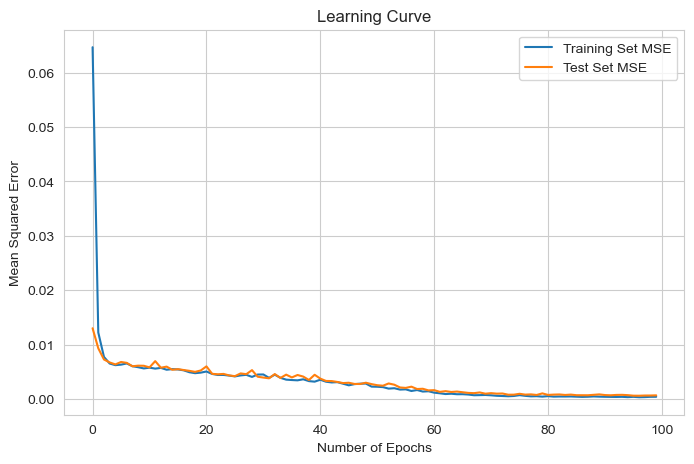

loss        0.000424
val_loss    0.000691
Name: 99, dtype: float64

In [58]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [59]:
test_rmse['Neural Network'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network'] = r2_score(y_train,y_pred_train)

# Models Performances (RMSE & R^2)

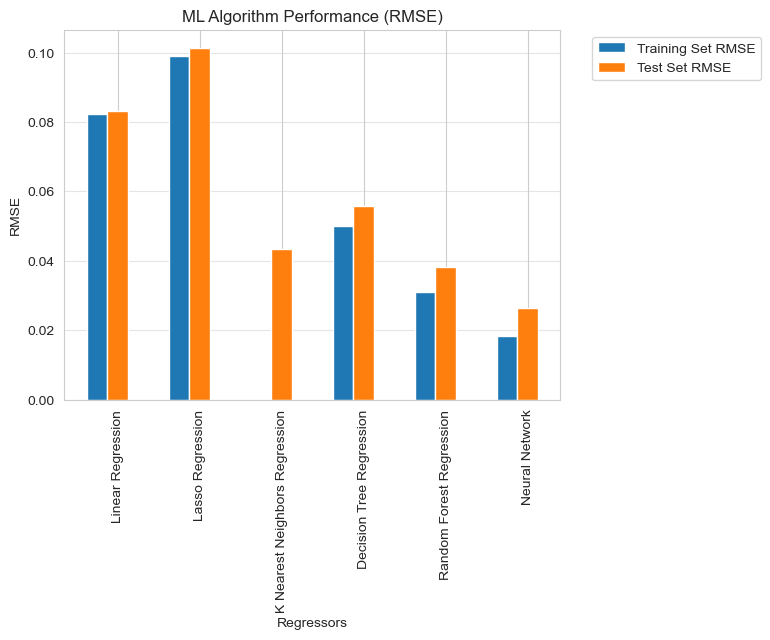

In [60]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

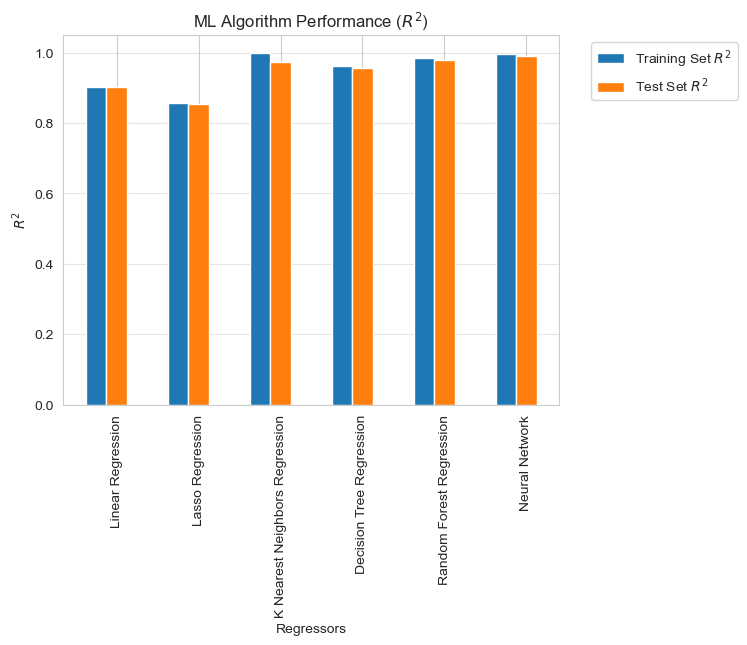

In [61]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Further Optimisation of NN
# 1. Expanding hyperparameter search space to include batch size and # of epochs as well.

In [62]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import random as python_random
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Define the build_model function with adjustable hyperparameters
def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(Dense(y.shape[1], **options))
    optimizer = tf.keras.optimizers.Adam()  
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create a KerasRegressor with the build_model function
keras_reg = KerasRegressor(build_model, verbose=0)

# Define an expanded search space for hyperparameters
params = {
    'n_hidden': [1, 2, 3],
    'n_neurons': [2, 4, 8, 16, 32, 64, 128],
    'batch_size': [32, 64, 128, 256],  # Add batch size as a hyperparameter
    'epochs': [30, 50, 100],  # Add more options for the number of epochs
}

from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV with the expanded parameter space
regressor = RandomizedSearchCV(keras_reg, param_distributions=params, cv=3, n_iter=21, random_state=42,
                               scoring='neg_mean_squared_error')

# Fit the regressor with the training data
regressor.fit(X_train, y_train)

# Print the best hyperparameters and corresponding MSE score
print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')


C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\3901682212.py:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_model, verbose=0)


Lowest MSE: 0.0041343581607347765
Using Hyperparameters: {'n_neurons': 32, 'n_hidden': 3, 'epochs': 100, 'batch_size': 32}


5/5 [==============================] - 0s 740us/step


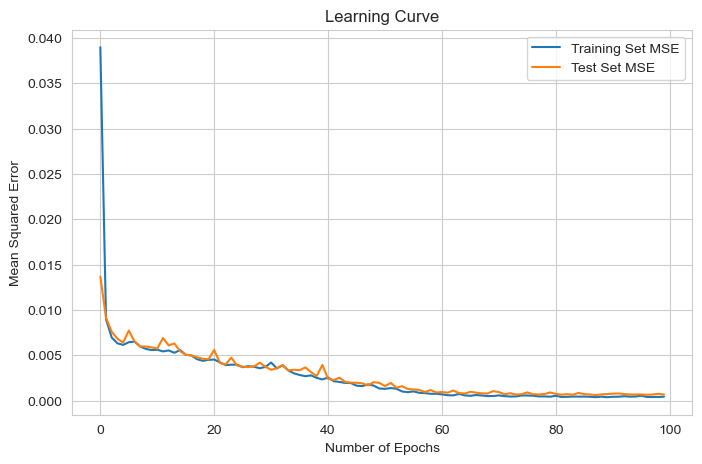

loss        0.000420
val_loss    0.000661
Name: 99, dtype: float64

In [63]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [64]:
test_rmse['Neural Network (Optimised)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network (Optimised)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network (Optimised)'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network (Optimised)'] = r2_score(y_train,y_pred_train)

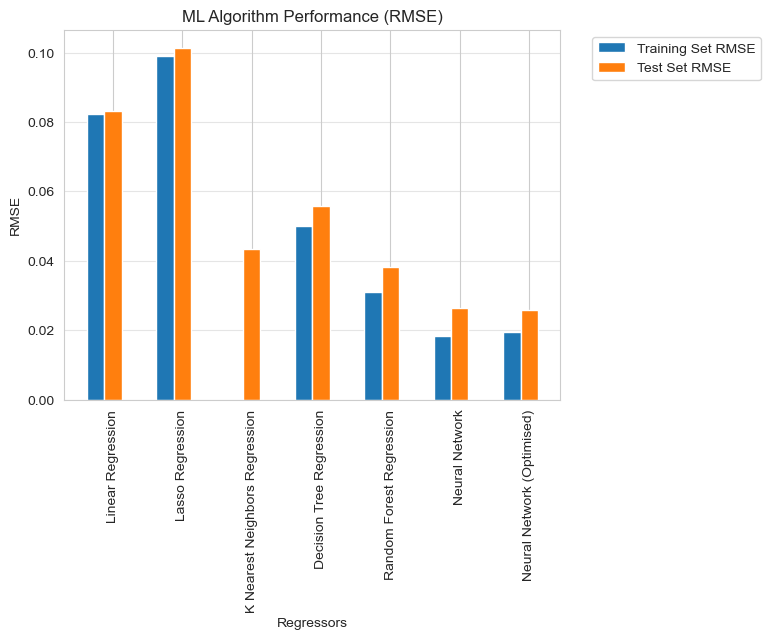

In [65]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

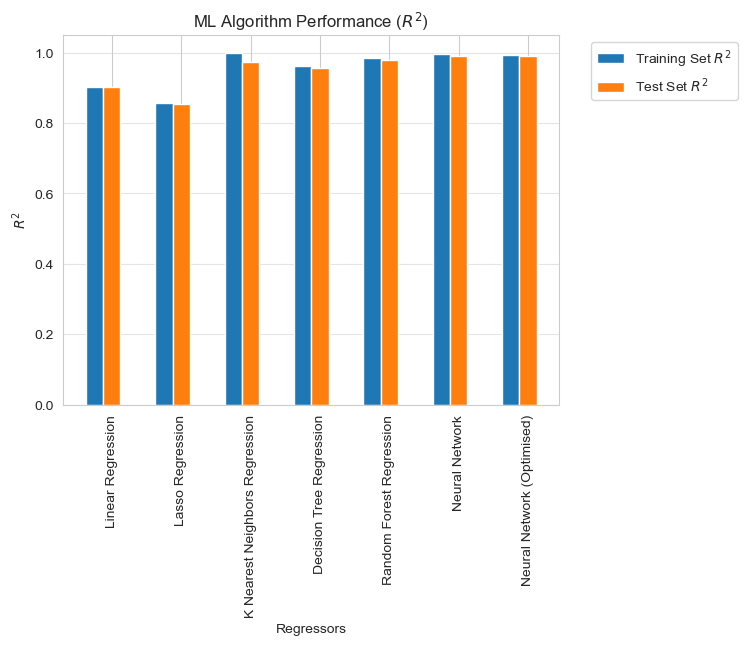

In [66]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Exploring use of different optimiser

In [67]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor
import random as python_random
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Define the build_model function with adjustable hyperparameters
def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(Dense(y.shape[1], **options))
    
    # Choose a different optimizer, e.g., RMSprop
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create a KerasRegressor with the build_model function
keras_reg = KerasRegressor(build_model, verbose=0)

# Define an expanded search space for hyperparameters
params = {
    'n_hidden': [1, 2, 3],
    'n_neurons': [2, 4, 8, 16, 32, 64, 128],
    'batch_size': [32, 64, 128, 256],  # Add batch size as a hyperparameter
    'epochs': [30, 50, 100],  # Add more options for the number of epochs
}

from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV with the expanded parameter space
regressor = RandomizedSearchCV(keras_reg, param_distributions=params, cv=3, n_iter=21, random_state=42,
                               scoring='neg_mean_squared_error')

# Fit the regressor with the training data
regressor.fit(X_train, y_train)

# Print the best hyperparameters and corresponding MSE score
print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')


C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\3339246345.py:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_model, verbose=0)


Lowest MSE: 0.004653079715912402
Using Hyperparameters: {'n_neurons': 32, 'n_hidden': 3, 'epochs': 100, 'batch_size': 32}


5/5 [==============================] - 0s 767us/step


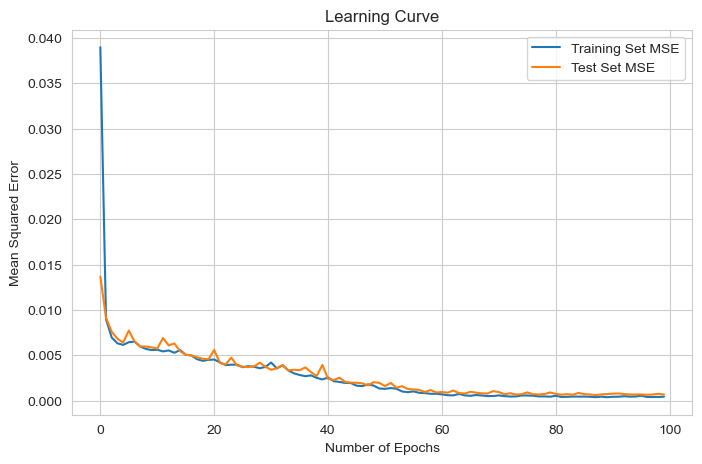

loss        0.000420
val_loss    0.000661
Name: 99, dtype: float64

In [68]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [69]:
test_rmse['Neural Network (Optimised v2)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network (Optimised v2)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network (Optimised v2)'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network (Optimised v2)'] = r2_score(y_train,y_pred_train)

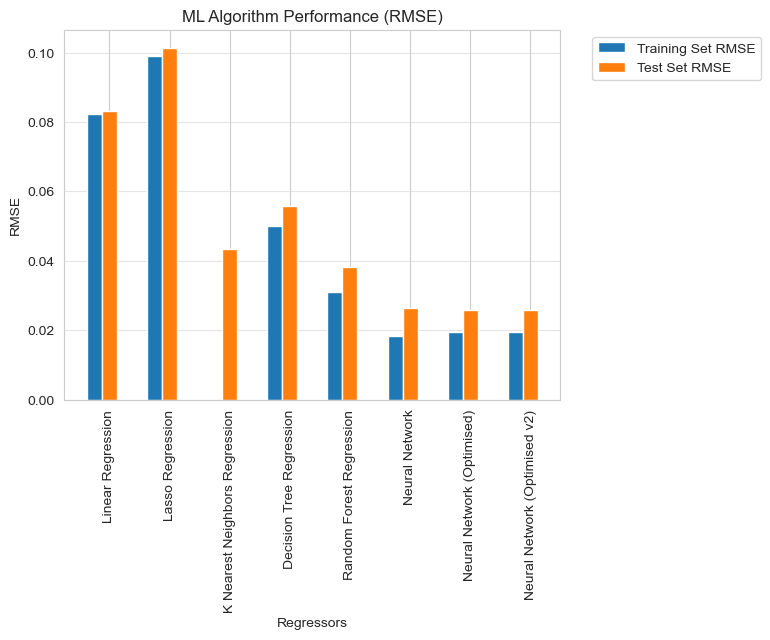

In [70]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

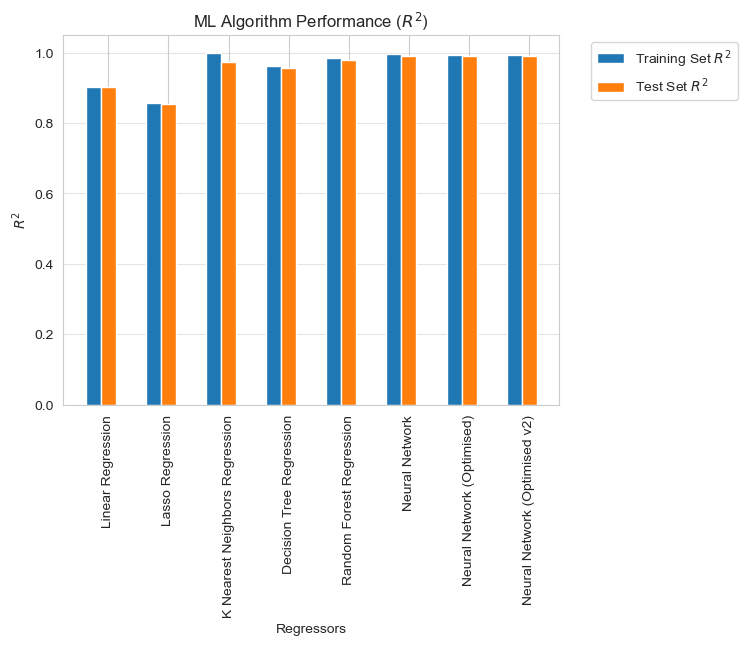

In [71]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Expanding hyperparameter search space for # of layers and neurons per layer.

In [72]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor
import random as python_random
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Define the build_model function with adjustable hyperparameters
def build_model(n_hidden=1, n_neurons=2, input_shape=[X.shape[1]]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(Dense(y.shape[1], **options))
    optimizer = tf.keras.optimizers.Adam()  
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create a KerasRegressor with the build_model function
keras_reg = KerasRegressor(build_model, verbose=0)

# Define an expanded search space for hyperparameters
params = {
    'n_hidden': [1, 2, 3, 4],  # Include more options for the number of hidden layers
    'n_neurons': [2, 4, 8, 16, 32, 64, 128, 256],  # Include more options for the number of neurons per layer
    'batch_size': [32, 64, 128, 256],  
    'epochs': [30, 50, 100],  
}

from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV with the expanded parameter space
regressor = RandomizedSearchCV(keras_reg, param_distributions=params, cv=3, n_iter=21, random_state=42,
                               scoring='neg_mean_squared_error')

# Fit the regressor with the training data
regressor.fit(X_train, y_train)

# Print the best hyperparameters and corresponding MSE score
print(f'Lowest MSE: {-regressor.best_score_}\nUsing Hyperparameters: {regressor.best_params_}')


C:\Users\alexa\AppData\Local\Temp\ipykernel_3852\47909438.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_model, verbose=0)


Lowest MSE: 0.0023526697010291214
Using Hyperparameters: {'n_neurons': 256, 'n_hidden': 2, 'epochs': 100, 'batch_size': 64}


5/5 [==============================] - 0s 889us/step


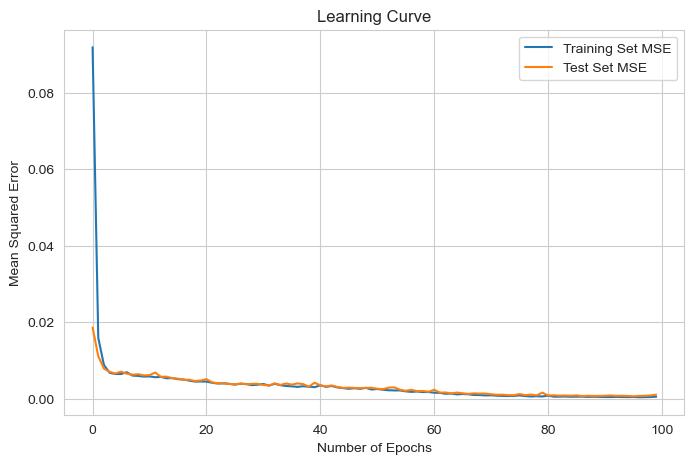

loss        0.000526
val_loss    0.001063
Name: 99, dtype: float64

In [73]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=100)

model_save = ModelCheckpoint('DNN_model.hdf5', save_best_only=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping, model_save], verbose=0)


y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.index = y_train.index
y_pred_train.columns = y_train.columns
 
y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.index = y_test.index
y_pred_test.columns = y_test.columns

metrics_data = pd.DataFrame(history.history)

plt.figure(figsize=(8,5))
plt.plot(metrics_data['loss'])
plt.plot(metrics_data['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Epochs')
plt.legend(['Training Set MSE', 'Test Set MSE'])
plt.show()

metrics_data.iloc[-1,:]

In [74]:
test_rmse['Neural Network (Optimised v3)'] = np.sqrt(mean_squared_error(y_test,y_pred_test))
train_rmse['Neural Network (Optimised v3)'] = np.sqrt(mean_squared_error(y_train,y_pred_train))
test_r2['Neural Network (Optimised v3)'] = r2_score(y_test,y_pred_test)
train_r2['Neural Network (Optimised v3)'] = r2_score(y_train,y_pred_train)

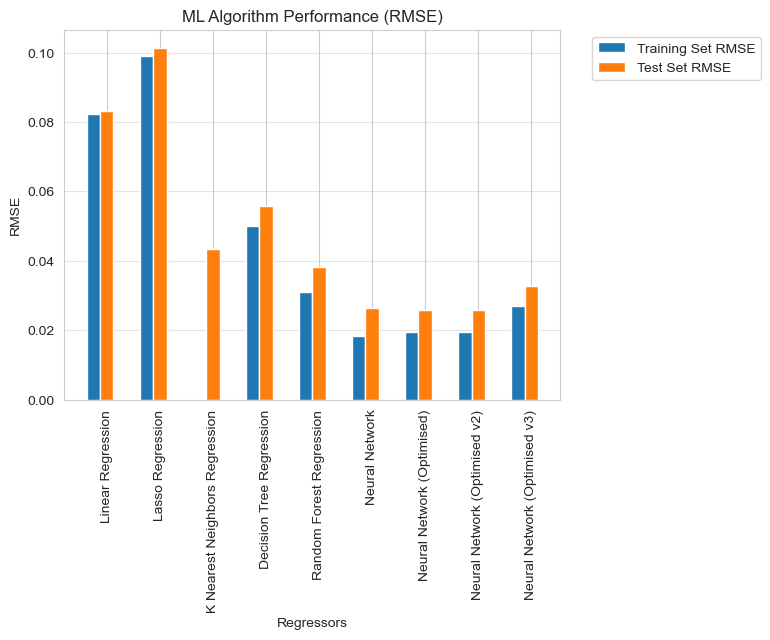

In [75]:
barwidth = 0.25

bars1 = train_rmse.values()
bars2 = test_rmse.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set RMSE')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set RMSE')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('RMSE')
plt.title('ML Algorithm Performance (RMSE)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

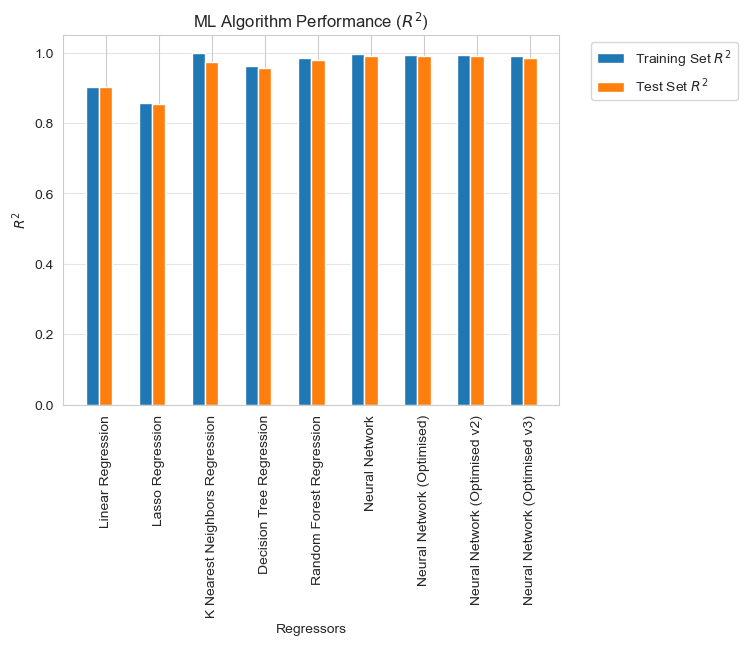

In [76]:
barwidth = 0.25

bars1 = train_r2.values()
bars2 = test_r2.values()

r1 = np.arange(len(bars1))
r2 = [x + barwidth for x in r1]

plt.bar(r1, bars1, width=barwidth, edgecolor='white', label='Training Set $R^{2}$')
plt.bar(r2, bars2, width=barwidth, edgecolor='white', label='Test Set $R^{2}$')

plt.xlabel('Regressors')
plt.xticks([r + barwidth for r in range(len(bars1))], train_rmse.keys(), rotation=90)
plt.ylabel('$R^{2}$')
plt.title('ML Algorithm Performance ($R^{2}$)')
plt.grid(alpha=0.5, which = 'major', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [77]:
print(test_rmse)
print(test_r2)

{'Linear Regression': 0.08323666760754533, 'Lasso Regression': 0.10146820494516526, 'K Nearest Neighbors Regression': 0.043467717212026885, 'Decision Tree Regression': 0.05579445973451147, 'Random Forest Regression': 0.03821918262713961, 'Neural Network': 0.026290970756958475, 'Neural Network (Optimised)': 0.025713777532619022, 'Neural Network (Optimised v2)': 0.025713777532619022, 'Neural Network (Optimised v3)': 0.03260182585941955}
{'Linear Regression': 0.902505810026824, 'Lasso Regression': 0.8550562242151345, 'K Nearest Neighbors Regression': 0.9732246055114235, 'Decision Tree Regression': 0.9556867044678654, 'Random Forest Regression': 0.9785010387733418, 'Neural Network': 0.9899457882212483, 'Neural Network (Optimised)': 0.9903334483851906, 'Neural Network (Optimised v2)': 0.9903334483851906, 'Neural Network (Optimised v3)': 0.9845504427086254}


# To conclude:
# 1. Change in search space in terms of including batch size and # of epoch helped improve the performance of the model.
# 2. Change in optimiser (from Adam to RMSprop) did not result to any improvements in performance of model.
# 3. Change in search space in terms of increasing # of hidden layers and # of neurons per layer decreased the performance of the model. This could possibly mean that the model is overfitting the model and may start to capture noise or irrelevant patterns in the data, leading to poor generalization on unseen data.